# Polarization behaviors on Twitter

This notebook contains the code to construct figures of the paper.

# Libraries import

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os
from mpl_toolkits.mplot3d import Axes3D

# Definition of timeframes

In [2]:
from datetime import datetime, date, timedelta

In [3]:
#List of periods of length w (in weeks) and c week(s) between
def get_periods(w,c):
    start_date = pd.Timestamp('2022-01-01 00:00:00')
    end_date = pd.Timestamp('2022-01-01 00:00:00')
    last_date = pd.Timestamp('2022-07-31 23:59:39')
    list_periods = []
    while end_date < last_date:
        end_date = start_date + timedelta(weeks=w) +timedelta(hours=23) + timedelta(minutes=59)+ timedelta(seconds=59)
        list_periods.append([start_date, end_date])
        if (w==c):
            start_date = start_date + timedelta(weeks=c) + timedelta(days=1)
        else:
            start_date = start_date + timedelta(weeks=c)
    list_periods[-1][1] = last_date
    return list_periods

In [4]:
periods = get_periods(4,2)

# Data import

All the necessary data to construct the figures are imported.

In [5]:
global_data_vacc = pd.read_csv('../results/holistic_analysis/vaccine_debate_final_data.csv', index_col=0)
global_data_ukr = pd.read_csv('../results/holistic_analysis/ukraine_conflict_debate_final_data.csv', index_col=0)

In [6]:
H_opinions_vacc = pd.read_csv('../results/temporal_analysis/factors_timeframes/vaccine_opinions.csv', index_col=0)
H_sources1_vacc = pd.read_csv('../results/temporal_analysis/factors_timeframes/vaccine_sources_C1.csv', index_col=0)
H_sources2_vacc = pd.read_csv('../results/temporal_analysis/factors_timeframes/vaccine_sources_C2.csv', index_col=0)

H_opinions_ukr = pd.read_csv('../results/temporal_analysis/factors_timeframes/ukraine_conflict_opinions.csv', index_col=0)
H_sources1_ukr = pd.read_csv('../results/temporal_analysis/factors_timeframes/ukraine_conflict_sources_C1.csv', index_col=0)
H_sources2_ukr = pd.read_csv('../results/temporal_analysis/factors_timeframes/ukraine_conflict_sources_C2.csv', index_col=0)

In [7]:
def transform(x):
    return (x+1)/2

In [8]:
H_opinions_trans_vacc = H_opinions_vacc.applymap(transform)
H_opinions_trans_ukr = H_opinions_ukr.applymap(transform)

In [9]:
grail_temporal_vacc = pd.read_csv('../results/temporal_analysis/vaccine_grail_temporal.csv', index_col=0)
grail_temporal_ukr = pd.read_csv('../results/temporal_analysis/ukraine_conflict_grail_temporal.csv', index_col=0)

In [10]:
clusters_vacc = pd.read_csv('../results/temporal_analysis/vaccine_clusters_labels.csv', index_col=0)
clusters_ukr = pd.read_csv('../results/temporal_analysis/ukraine_conflict_clusters_labels.csv', index_col=0)

In [11]:
lists_users_vacc = pd.read_csv('../results/temporal_analysis/vaccine_lists_users.csv', index_col=0)
inter_users_vacc = lists_users_vacc.loc[0,'inter']
provax_users = lists_users_vacc.loc[0,'C1']
antivax_users = lists_users_vacc.loc[0,'C2']


lists_users_ukr = pd.read_csv('../results/temporal_analysis/ukraine_conflict_lists_users.csv', index_col=0)
inter_users_ukr = lists_users_ukr.loc[0,'inter']
proU_users = lists_users_ukr.loc[0,'C1']
proR_users = lists_users_ukr.loc[0,'C2']

In [12]:
dynamics_vacc = pd.read_csv('../results/temporal_analysis/vaccine_dynamics.csv', index_col=0)
dynamics_ukr = pd.read_csv('../results/temporal_analysis/ukraine_conflict_dynamics.csv', index_col=0)

# Definition of global paramaters for the figures

In [13]:
plt.rcParams['grid.linewidth'] = 0.1   # change linwidth
plt.rcParams['grid.color'] = "gray" # change color
plt.rcParams['font.family'] = "no-serif"

# Clustering over time frames

## Comparison of the evolution of the number of identified clusted between the two debates

In [14]:
nb_vacc = [4,4,4,2,2,2,2,2,2,2,2,2,2,2,2]
nb_ukr = [8,9,3,3,4,4,4,4,4,4,4,4,4,2,2]

In [15]:
nb_clusters = pd.DataFrame(columns=['Covid-19 vaccine debate', 'Ukraine conflict debate'])
nb_clusters['Covid-19 vaccine debate'] = nb_vacc
nb_clusters['Ukraine conflict debate'] = nb_ukr

findfont: Font family ['no-serif'] not found. Falling back to DejaVu Sans.


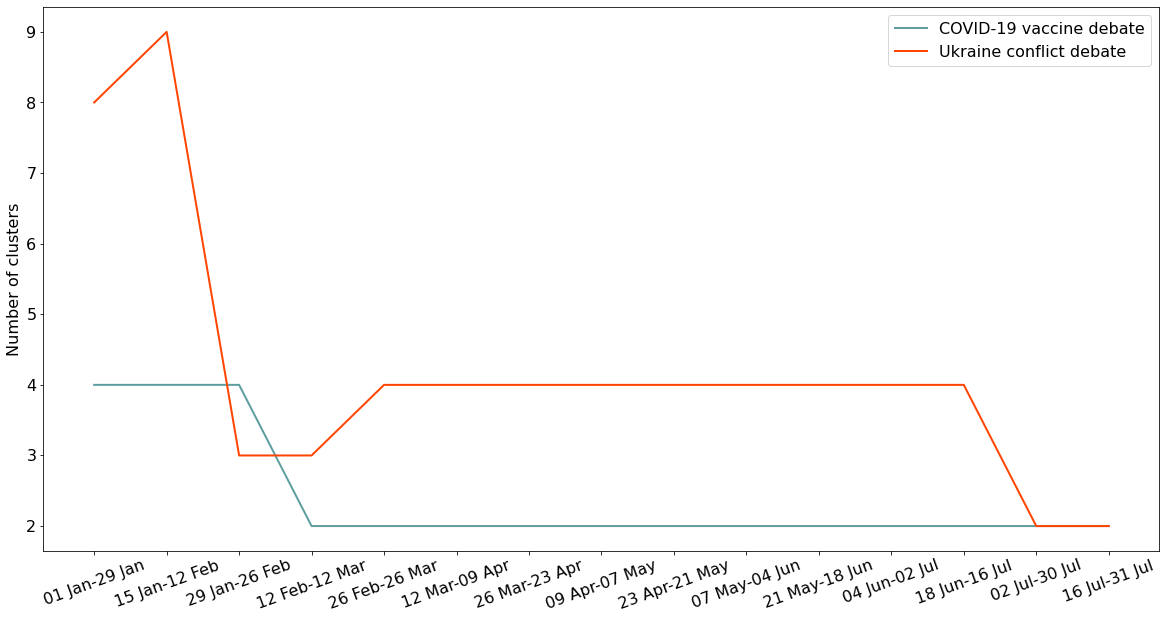

In [16]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(nb_clusters['Covid-19 vaccine debate'],color='cadetblue', linewidth=2)
ax.plot(nb_clusters['Ukraine conflict debate'],color='orangered', linewidth=2)


ax.set_ylabel('Number of clusters', fontsize='16')

labels = []
for p in range(len(periods)):
    label = periods[p][0].strftime('%d %b')+'-'+periods[p][1].strftime('%d %b')
    labels.append(label)
ax.set_xticks(np.arange(0,15,1),labels, rotation = 20, fontsize='16')
ax.legend(['COVID-19 vaccine debate','Ukraine conflict debate'], fontsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.savefig('nb_clusters_evolution.pdf', format='pdf')
plt.show()

# Clusters in a 3D space

In [17]:
#Get weighted factors
global_data_vacc['x_final_alpha'] = 0.6*global_data_vacc['x_final']
global_data_vacc['y_C1_final_alpha'] = 0.2*global_data_vacc['y_pro_final']
global_data_vacc['y_C2_final_alpha'] = 0.2*global_data_vacc['y_anti_final']


global_data_ukr['x_final_alpha'] = 0.6*global_data_ukr['x_final']
global_data_ukr['y_C1_final_alpha'] = 0.2*global_data_ukr['y_proU_final']
global_data_ukr['y_C2_final_alpha'] = 0.2*global_data_ukr['y_proR_final']

In [18]:
X_glob_vacc = global_data_vacc[['x_final_alpha','y_C1_final_alpha','y_C2_final_alpha','cluster']]
X_glob_vacc.columns = ['x','y_C1','y_C2','cluster']

X_glob_ukr = global_data_ukr[['x_final_alpha','y_C1_final_alpha','y_C2_final_alpha','cluster']]
X_glob_ukr.columns = ['x','y_C1','y_C2','cluster']

In [19]:
users_vacc = clusters_vacc.columns.tolist()
users_ukr = clusters_ukr.columns.tolist()

In [20]:
def f_sigmoid_optim(x):
    return(x**(a)/(x**(a)+(1-x)**(a)))

In [21]:
a = 1/2
H_opinions_vacc = H_opinions_vacc.apply(f_sigmoid_optim)
H_sources1_vacc = H_sources1_vacc.apply(f_sigmoid_optim)
H_sources2_vacc = H_sources2_vacc.apply(f_sigmoid_optim)


a = 1/3
H_opinions_ukr = H_opinions_ukr.apply(f_sigmoid_optim)
H_sources1_ukr = H_sources1_ukr.apply(f_sigmoid_optim)
H_sources2_ukr = H_sources2_ukr.apply(f_sigmoid_optim)

## COVID-19 vaccine debate

### Clusters over the entire period

findfont: Font family ['no-serif'] not found. Falling back to DejaVu Sans.


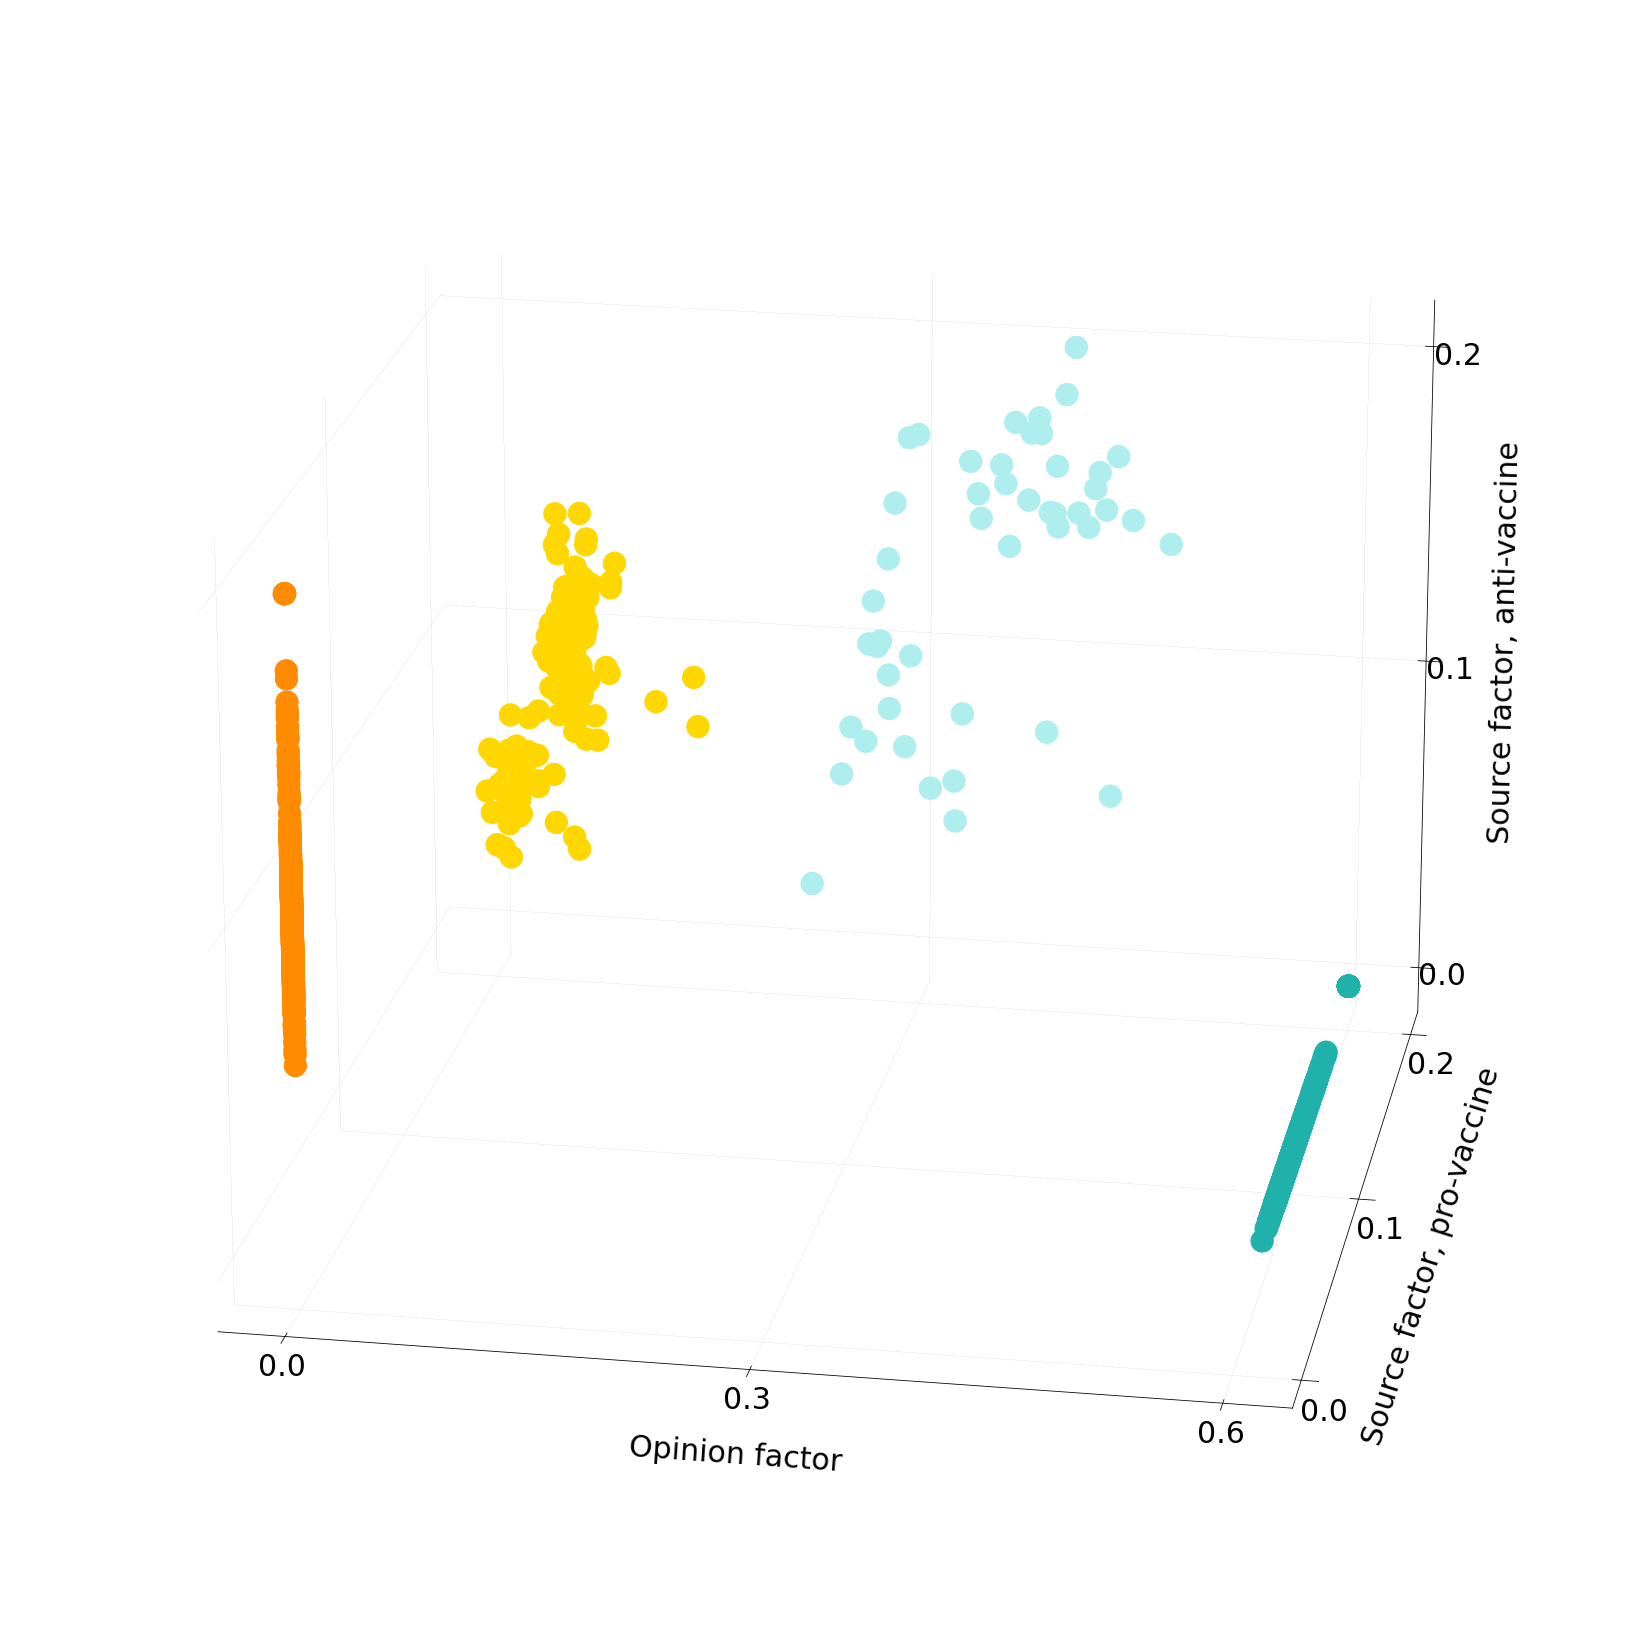

In [22]:
cluster_1_vacc=  X_glob_vacc[X_glob_vacc['cluster']==0]
cluster_2_vacc = X_glob_vacc[X_glob_vacc['cluster']==1]
cluster_3_vacc = X_glob_vacc[X_glob_vacc['cluster']==2]
cluster_4_vacc = X_glob_vacc[X_glob_vacc['cluster']==3]



fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.scatter(cluster_1_vacc['x'], cluster_1_vacc['y_C1'], cluster_1_vacc['y_C2'], marker ='o', c='lightseagreen', s= 500, alpha=1)
ax.scatter(cluster_2_vacc['x'], cluster_2_vacc['y_C1'], cluster_2_vacc['y_C2'], marker ='o', c='darkorange', s= 500, alpha=1)
ax.scatter(cluster_3_vacc['x'], cluster_3_vacc['y_C1'], cluster_3_vacc['y_C2'], marker ='o', c='gold', s= 500, alpha=1)
ax.scatter(cluster_4_vacc['x'], cluster_4_vacc['y_C1'], cluster_4_vacc['y_C2'], marker ='o', c='paleturquoise', s= 500, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=40)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=40)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=40)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30, pad=10)
ax.tick_params(axis='z', labelsize=30, pad=10)

ax.view_init(20, -80)

plt.savefig('holistic_clusters_vaccine.pdf', format='pdf')

### Clusters for each time frame

In [27]:
P1_vacc_1 = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P1_vacc_1['x'] = 0.6 * H_opinions_trans_vacc.iloc[0,]
P1_vacc_1['y_C1'] = 0.2 * H_sources1_vacc.iloc[0,]
P1_vacc_1['y_C2'] = 0.2 * H_sources2_vacc.iloc[0,]

for u in users_vacc:
    P1_ukr_1.loc[u,'cluster'] = clusters_vacc.loc[0,u]

P1_vacc_2 = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P1_vacc_2['x'] = 0.6 * H_opinions_trans_vacc.iloc[1,]
P1_vacc_2['y_C1'] = 0.2 * H_sources1_vacc.iloc[1,]
P1_vacc_2['y_C2'] = 0.2 * H_sources2_vacc.iloc[1,]

for u in users_vacc:
    P1_vacc_2.loc[u,'cluster'] = clusters_vacc.loc[1,u]

P1_vacc_3 = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P1_vacc_3['x'] = 0.6 * H_opinions_trans_vacc.iloc[2,]
P1_vacc_3['y_C1'] = 0.2 * H_sources1_vacc.iloc[2,]
P1_vacc_3['y_C2'] = 0.2 * H_sources2_vacc.iloc[2,]

for u in users_vacc:
    P1_vacc_3.loc[u,'cluster'] = clusters_vacc.loc[2,u]

In [28]:
inter_users_vacc = P1_vacc_1[P1_vacc_1['cluster']=='interPro'].index.tolist() + P1_vacc_1[P1_vacc_1['cluster']=='interAnti'].index.tolist() 

In [29]:
P2_vacc_1 = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P2_vacc_1['x'] = 0.6 * H_opinions_trans_vacc.iloc[14,]
P2_vacc_1['y_C1'] = 0.2 * H_sources1_vacc.iloc[14,]
P2_vacc_1['y_C2'] = 0.2 * H_sources2_vacc.iloc[14,]

for u in users_vacc:
    P2_vacc_1.loc[u,'cluster'] = clusters_vacc.loc[14,u]

In [67]:
P2_vacc['cluster'].value_counts()

anti    454
pro     231
Name: cluster, dtype: int64

In [30]:
%matplotlib inline

In [36]:
cluster_1_P1_1 = P1_vacc_1[P1_vacc_1['cluster']=='pro']
cluster_2_P1_1 = P1_vacc_1[P1_vacc_1['cluster']=='anti']
cluster_3_P1_1 = P1_vacc_1[P1_vacc_1['cluster']=='interAnti']
cluster_4_P1_1 = P1_vacc_1[P1_vacc_1['cluster']=='interPro']

cluster_1_P1_2 = P1_vacc_2[P1_vacc_2['cluster']=='pro']
cluster_2_P1_2 = P1_vacc_2[P1_vacc_2['cluster']=='anti']
cluster_3_P1_2 = P1_vacc_2[P1_vacc_2['cluster']=='interAnti']
cluster_4_P1_2 = P1_vacc_2[P1_vacc_2['cluster']=='interPro']

cluster_1_P1_3 = P1_vacc_3[P1_vacc_3['cluster']=='pro']
cluster_2_P1_3 = P1_vacc_3[P1_vacc_3['cluster']=='anti']
cluster_3_P1_3 = P1_vacc_3[P1_vacc_3['cluster']=='interAnti']
cluster_4_P1_3 = P1_vacc_3[P1_vacc_3['cluster']=='interPro']

cluster_1_P2_1 = P2_vacc_1[(P2_vacc_1['cluster']=='pro') & (P2_vacc_1.index.isin(inter_users_vacc))]
cluster_2_P2_1 = P2_vacc_1[(P2_vacc_1['cluster']=='anti') & (P2_vacc_1.index.isin(inter_users_vacc))]

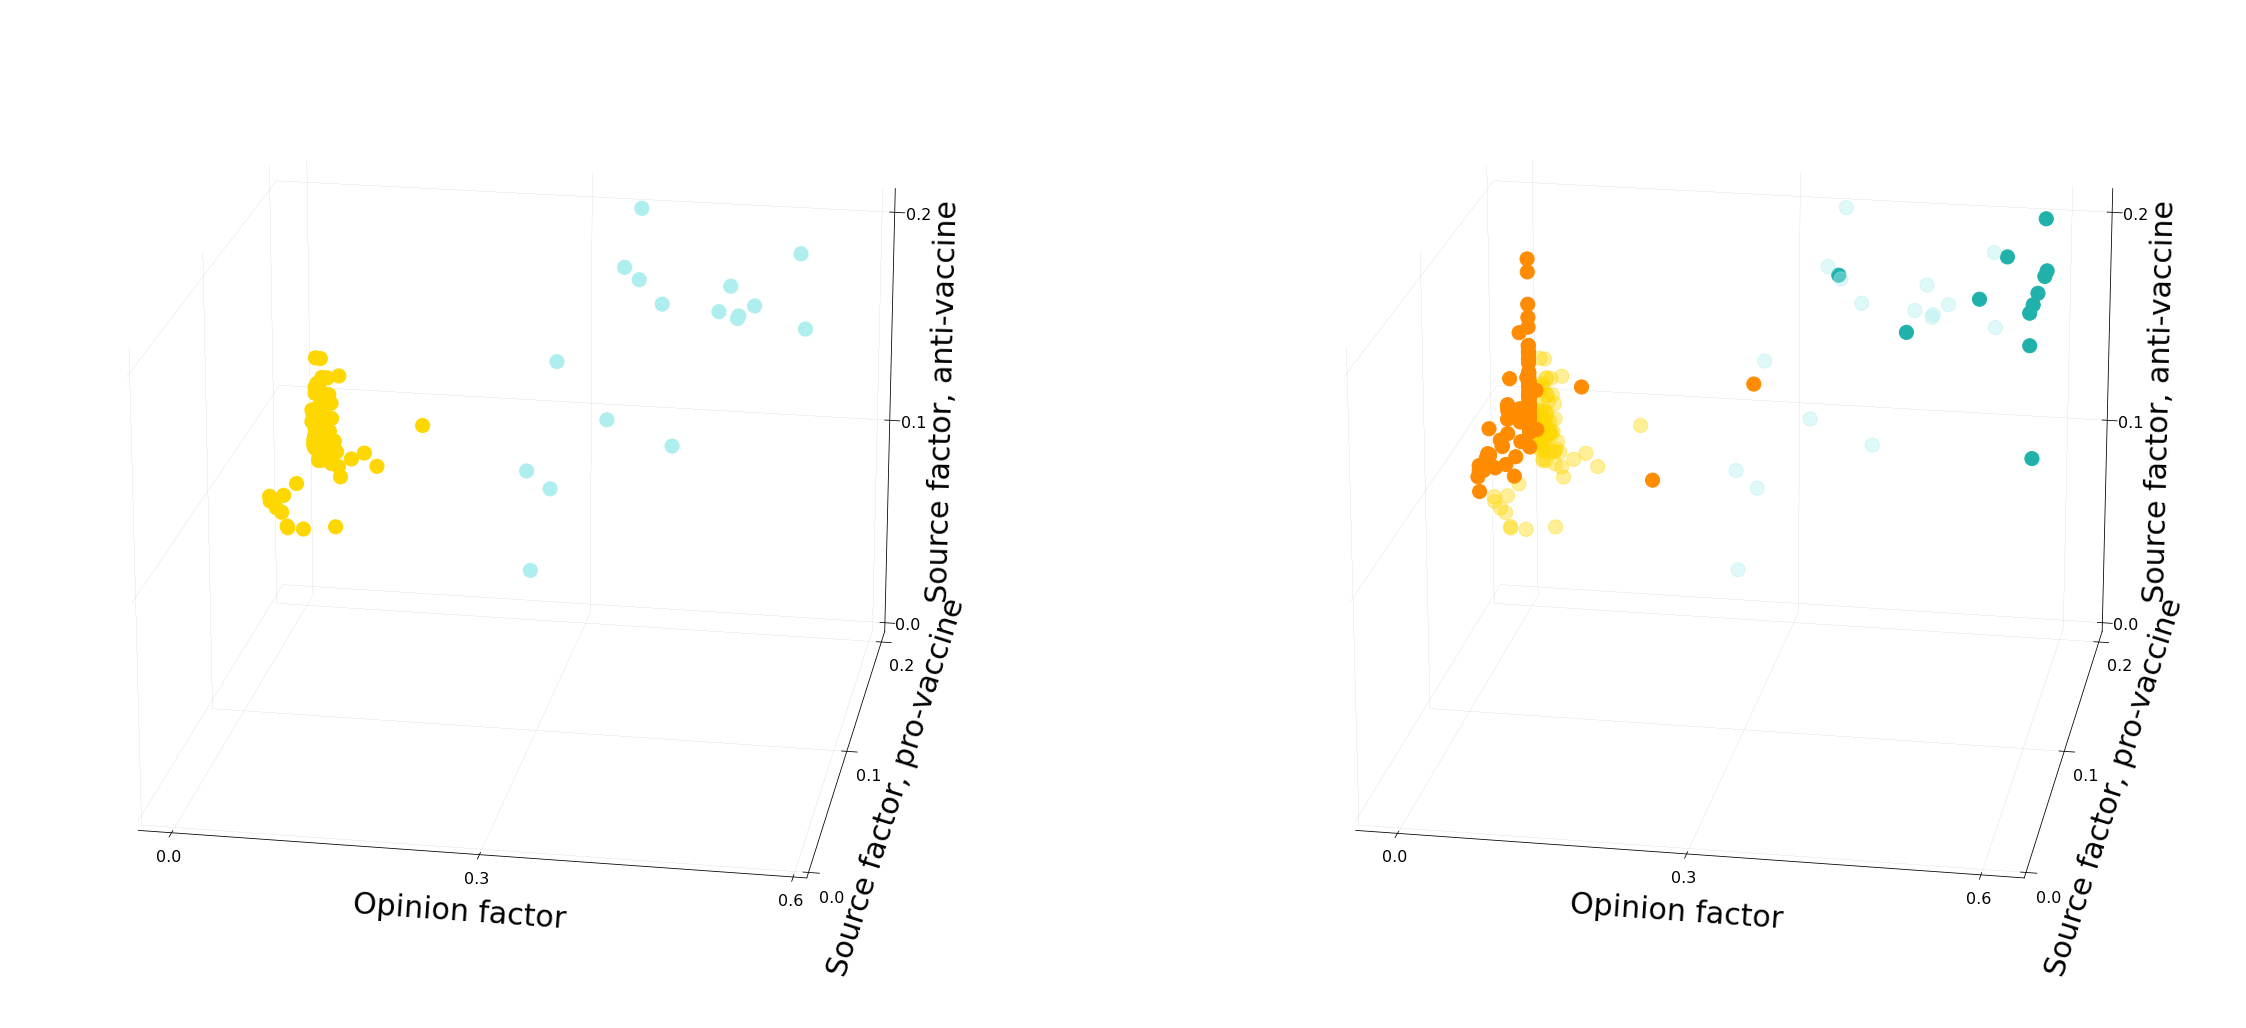

In [76]:
cluster_1_P1 = P1_vacc_1[P1_vacc_1['cluster']=='pro']
cluster_2_P1 = P1_vacc_1[P1_vacc_1['cluster']=='anti']
cluster_3_P1 = P1_vacc_1[P1_vacc_1['cluster']=='interAnti']
cluster_4_P1 = P1_vacc_1[P1_vacc_1['cluster']=='interPro']

cluster_1_P2 = P2_vacc_1[(P2_vacc_1['cluster']=='pro') & (P2_vacc_1.index.isin(inter_users_vacc))]
cluster_2_P2 = P2_vacc_1[(P2_vacc_1['cluster']=='anti') & (P2_vacc_1.index.isin(inter_users_vacc))]

fig = plt.figure(figsize=(40,40))

ax = fig.add_subplot(1, 2, 1, projection='3d')
#ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


ax.scatter(cluster_3_P1['x'], cluster_3_P1['y_C1'], cluster_3_P1['y_C2'], marker ='o', c='gold', s= 200, alpha=1)
ax.scatter(cluster_4_P1['x'], cluster_4_P1['y_C1'], cluster_4_P1['y_C2'], marker ='o', c='paleturquoise', s= 200, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

# ax.set_xlabel(r'$H^\prime_o$', fontsize='20', labelpad=20)
# ax.set_ylabel(r'$H^\prime{s,pro}$', fontsize='20', labelpad=20)
# ax.set_zlabel(r'$H^\prime{s,anti}$', fontsize='20', labelpad=20)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=20)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=20)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=20)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)


ax = fig.add_subplot(1, 2, 2, projection='3d')
#ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.scatter(cluster_3_P1['x'], cluster_3_P1['y_C1'], cluster_3_P1['y_C2'], marker ='o', c='gold', s= 200, alpha=0.4)
ax.scatter(cluster_4_P1['x'], cluster_4_P1['y_C1'], cluster_4_P1['y_C2'], marker ='o', c='paleturquoise', s= 200, alpha=0.4)
ax.scatter(cluster_1_P2['x'], cluster_1_P2['y_C1'], cluster_1_P2['y_C2'], marker ='o', c='lightseagreen', s= 200, alpha=1)
ax.scatter(cluster_2_P2['x'], cluster_2_P2['y_C1'], cluster_2_P2['y_C2'], marker ='o', c='darkorange', s= 200, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

# ax.set_xlabel(r'$H^\prime_o$', fontsize='20', labelpad=20)
# ax.set_ylabel(r'$H^\prime{s,pro}$', fontsize='20', labelpad=20)
# ax.set_zlabel(r'$H^\prime{s,anti}$', fontsize='20', labelpad=20)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=20)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=20)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=20)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)
plt.savefig('temporal_clusters_vaccine.pdf', format='pdf')

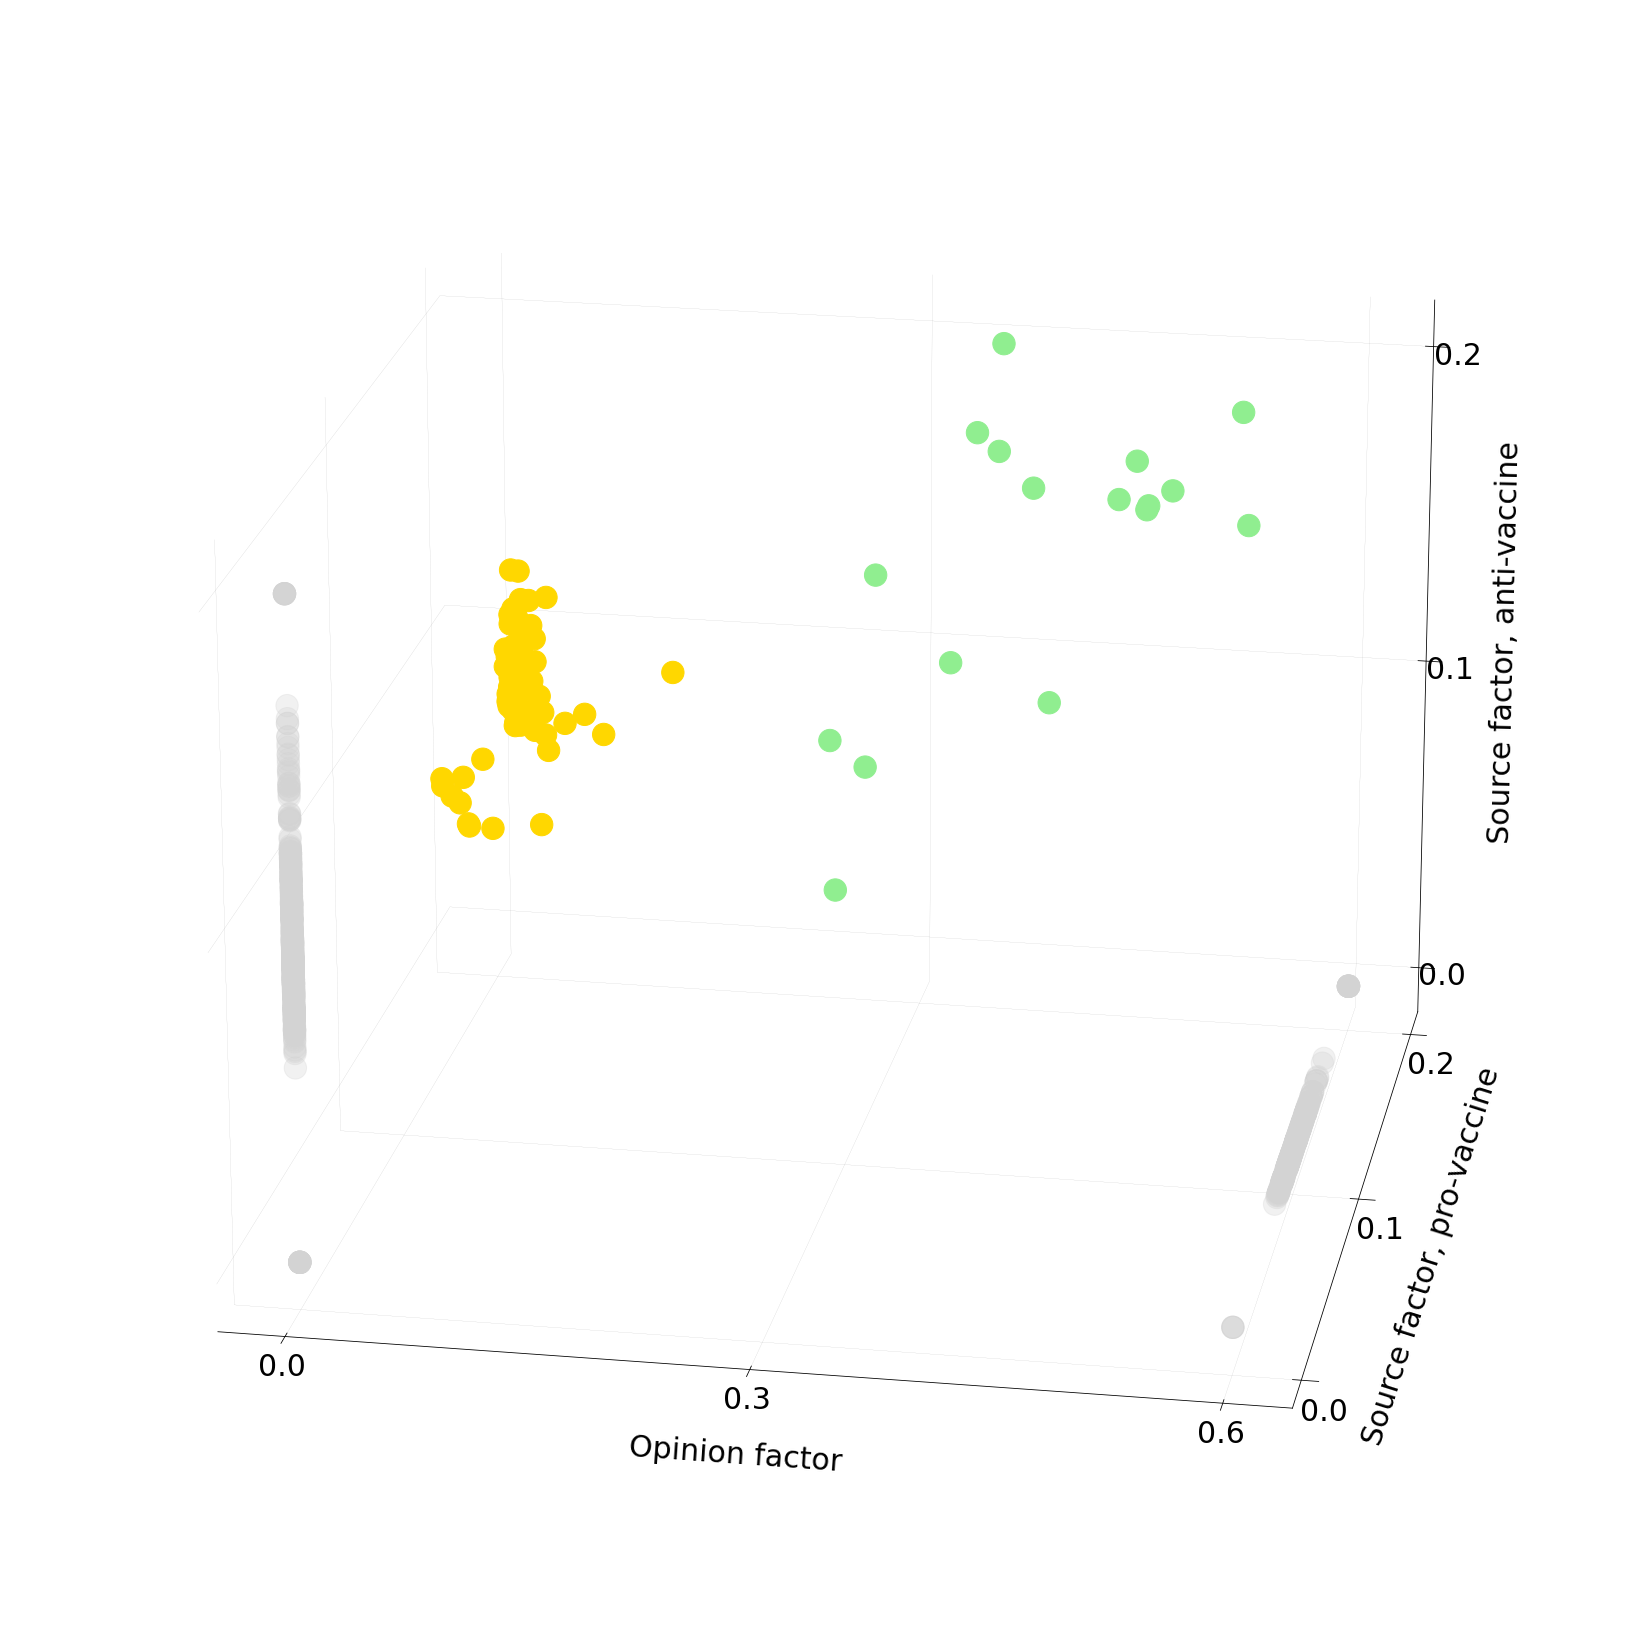

In [77]:
fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.scatter(cluster_1_P1['x'], cluster_1_P1['y_C1'], cluster_1_P1['y_C2'], marker ='o', c='lightgrey', s= 500, alpha= 0.3)
ax.scatter(cluster_2_P1['x'], cluster_2_P1['y_C1'], cluster_2_P1['y_C2'], marker ='o', c='lightgrey', s= 500, alpha=0.3)


ax.scatter(cluster_3_P1_1['x'], cluster_3_P1_1['y_C1'], cluster_3_P1_1['y_C2'], marker ='o', c='gold', s= 500, alpha= 1)
ax.scatter(cluster_4_P1_1['x'], cluster_4_P1_1['y_C1'], cluster_4_P1_1['y_C2'], marker ='o', c='lightgreen', s= 500, alpha=1)

# ax.scatter(cluster_3_P1_2['x'], cluster_3_P1_2['y_C1'], cluster_3_P1_2['y_C2'], marker ='o', c='gold', s= 500, alpha=1)
# ax.scatter(cluster_4_P1_2['x'], cluster_4_P1_2['y_C1'], cluster_4_P1_2['y_C2'], marker ='o', c='lightgreen', s= 500, alpha=1)


# ax.scatter(cluster_3_P1_3['x'], cluster_3_P1_3['y_C1'], cluster_3_P1_3['y_C2'], marker ='o', c='gold', s= 500, alpha=1)
# ax.scatter(cluster_4_P1_3['x'], cluster_4_P1_3['y_C1'], cluster_4_P1_3['y_C2'], marker ='o', c='lightgreen', s= 500, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=40)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=40)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=40)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30, pad=10)
ax.tick_params(axis='z', labelsize=30, pad=10)

ax.view_init(20, -80)

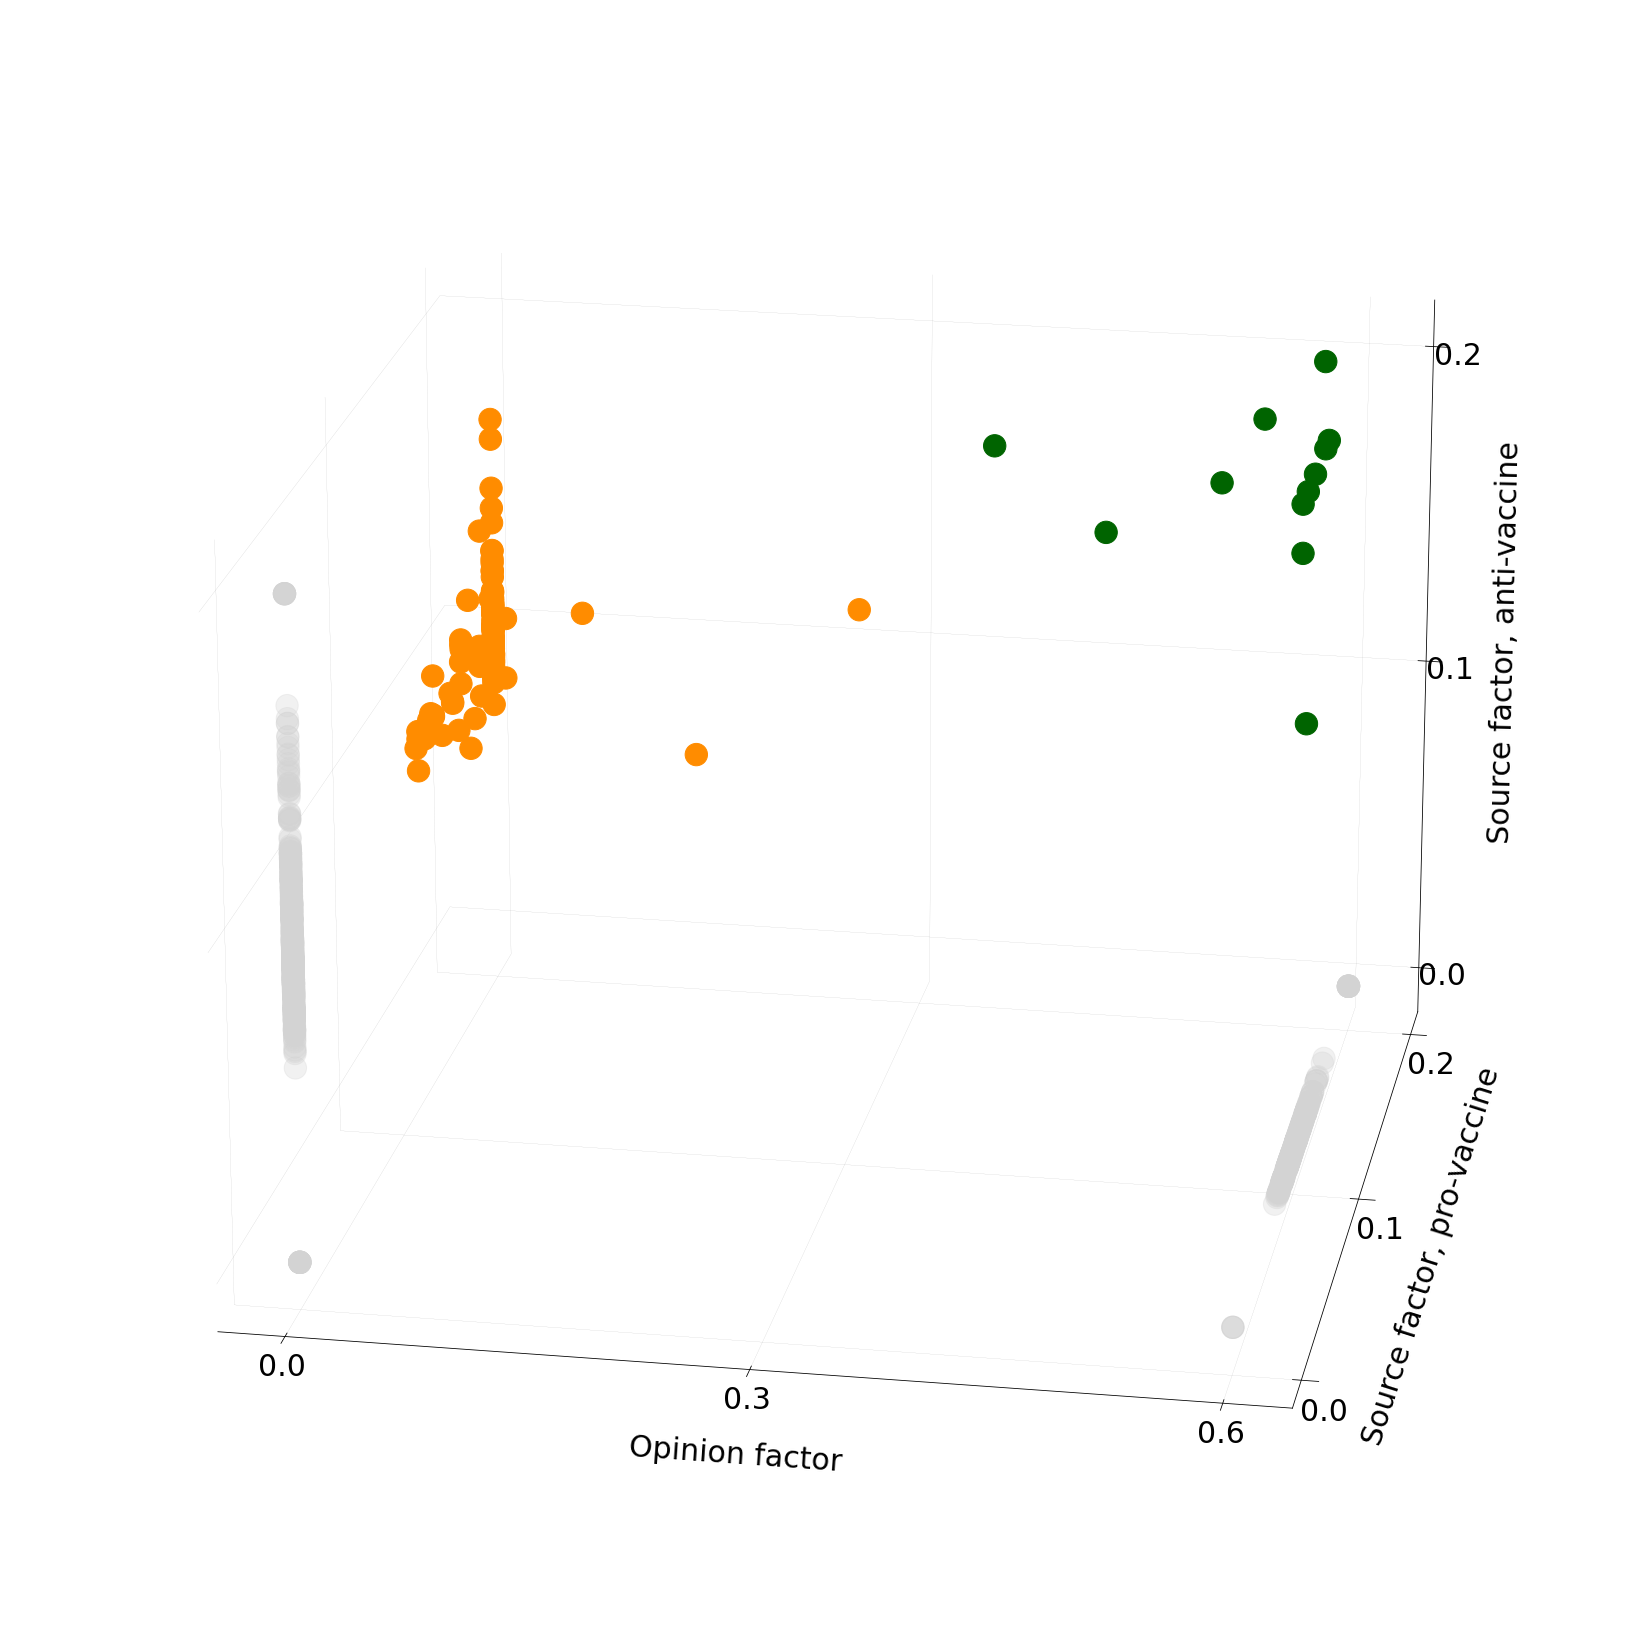

In [78]:
fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# ax.scatter(cluster_3_P1['x'], cluster_3_P1['y_C1'], cluster_3_P1['y_C2'], marker ='o', c='gold', s= 500, alpha=0.4)
# ax.scatter(cluster_4_P1['x'], cluster_4_P1['y_C1'], cluster_4_P1['y_C2'], marker ='o', c='paleturquoise', s= 500, alpha=0.4)

ax.scatter(cluster_1_P1['x'], cluster_1_P1['y_C1'], cluster_1_P1['y_C2'], marker ='o', c='lightgrey', s= 500, alpha= 0.3)
ax.scatter(cluster_2_P1['x'], cluster_2_P1['y_C1'], cluster_2_P1['y_C2'], marker ='o', c='lightgrey', s= 500, alpha=0.3)



ax.scatter(cluster_1_P2['x'], cluster_1_P2['y_C1'], cluster_1_P2['y_C2'], marker ='o', c='darkgreen', s= 500, alpha=1)
ax.scatter(cluster_2_P2['x'], cluster_2_P2['y_C1'], cluster_2_P2['y_C2'], marker ='o', c='darkorange', s= 500, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=40)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=40)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=40)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30, pad=10)
ax.tick_params(axis='z', labelsize=30, pad=10)

ax.view_init(20, -80)

## Ukraine

### Clusters over the entire period

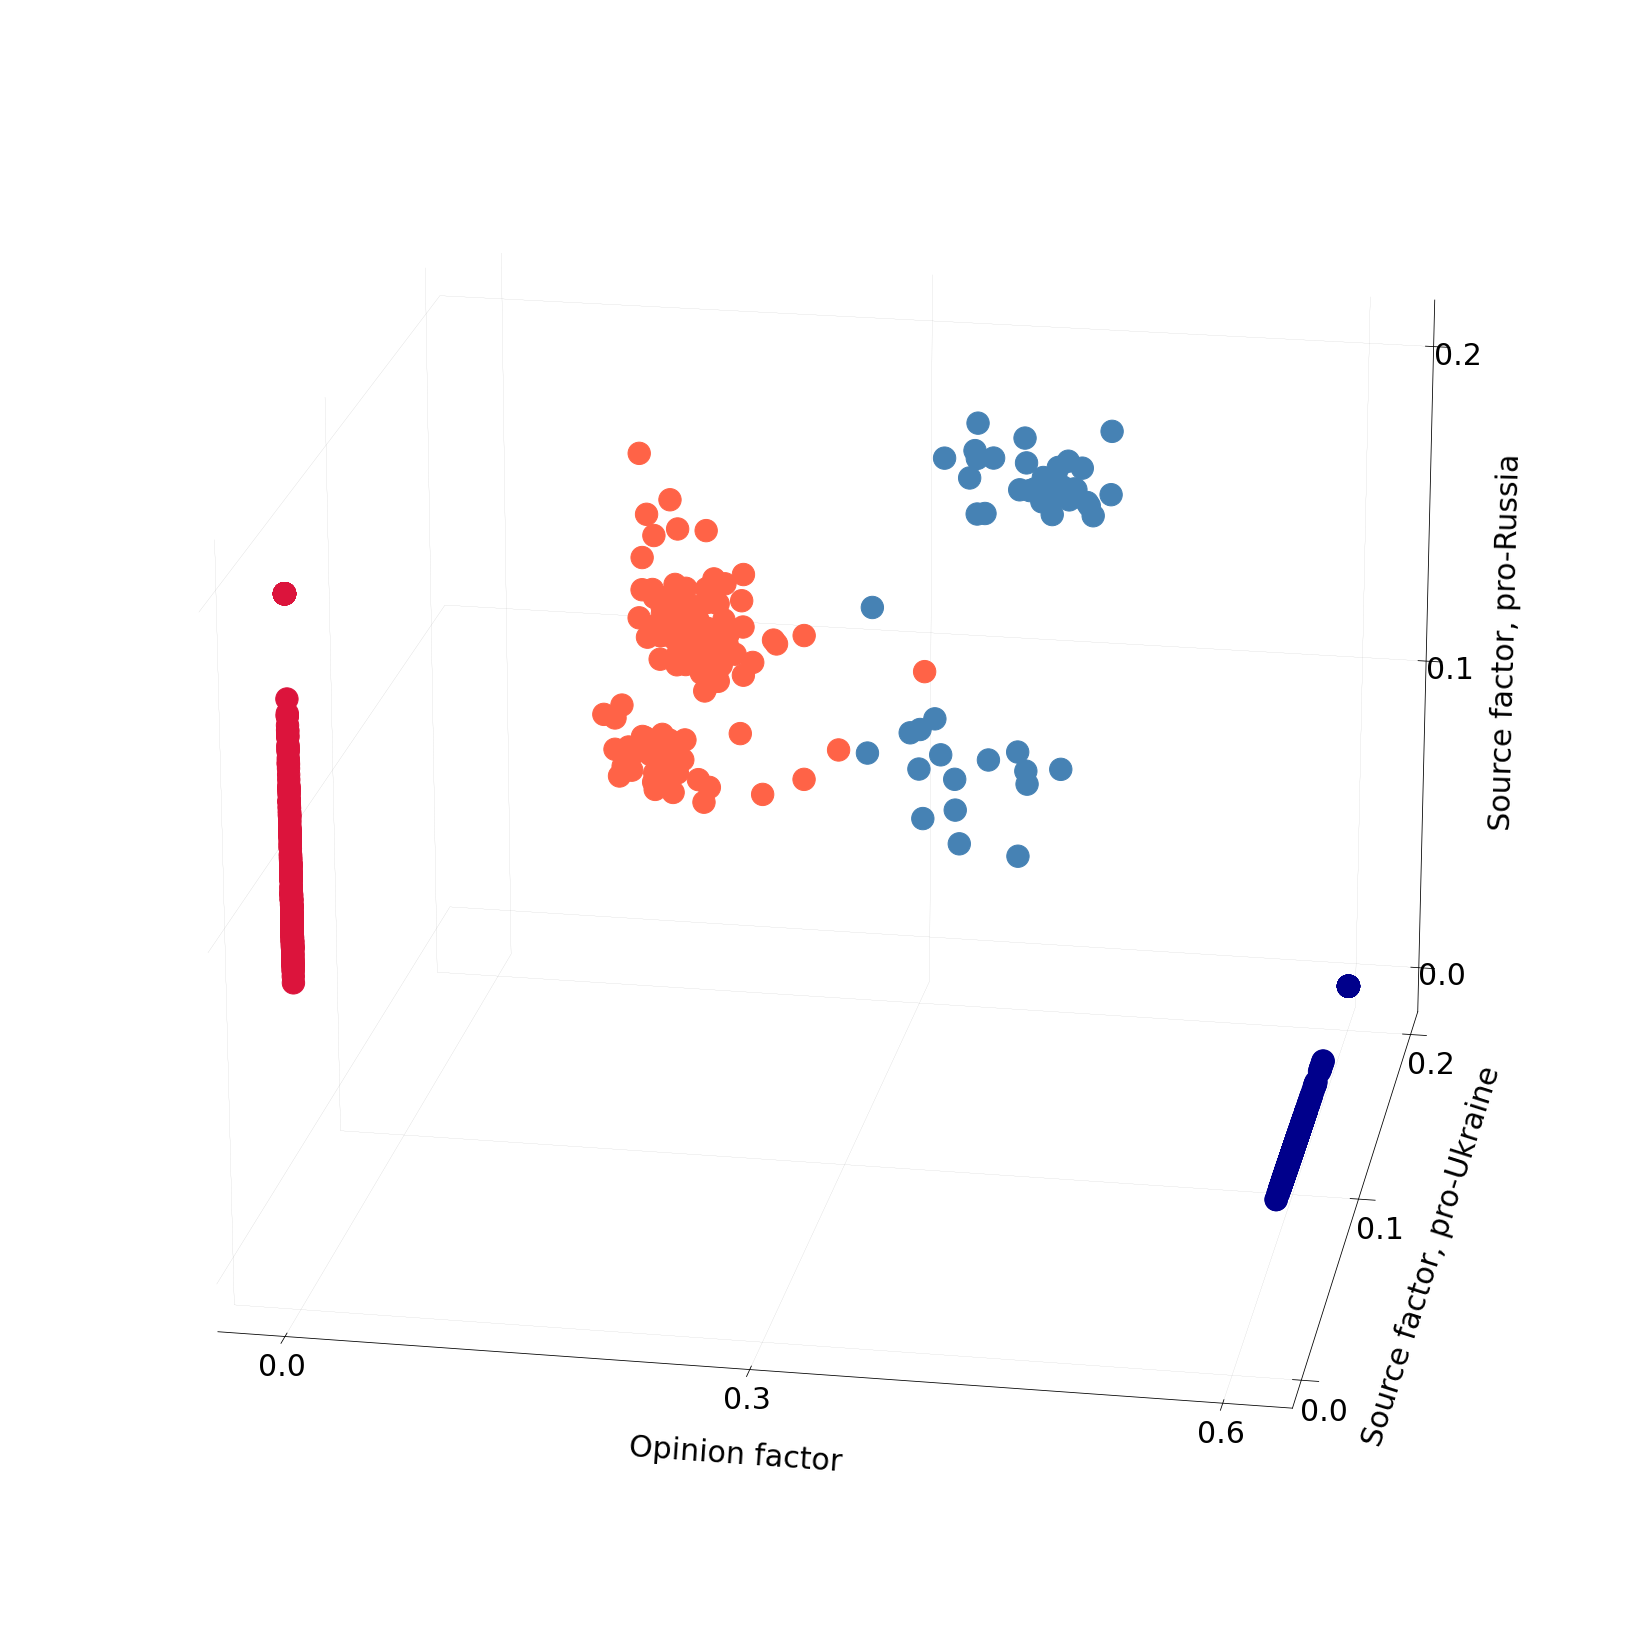

In [73]:
cluster_1_ukr=  X_glob_ukr[X_glob_ukr['cluster']==0]
cluster_2_ukr = X_glob_ukr[X_glob_ukr['cluster']==1]
cluster_3_ukr = X_glob_ukr[X_glob_ukr['cluster']==2]
cluster_4_ukr = X_glob_ukr[X_glob_ukr['cluster']==3]



fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


ax.scatter(cluster_1_ukr['x'], cluster_1_ukr['y_C1'], cluster_1_ukr['y_C2'], marker ='o', c='darkblue', s= 500, alpha=1)
ax.scatter(cluster_2_ukr['x'], cluster_2_ukr['y_C1'], cluster_2_ukr['y_C2'], marker ='o', c='crimson', s= 500, alpha=1)
ax.scatter(cluster_3_ukr['x'], cluster_3_ukr['y_C1'], cluster_3_ukr['y_C2'], marker ='o', c='tomato', s= 500, alpha=1)
ax.scatter(cluster_4_ukr['x'], cluster_4_ukr['y_C1'], cluster_4_ukr['y_C2'], marker ='o', c='steelblue', s= 500, alpha=1)


ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=40)
ax.set_ylabel('Source factor, pro-Ukraine', fontsize='30', labelpad=40)
ax.set_zlabel('Source factor, pro-Russia', fontsize='30', labelpad=40)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30, pad=10)
ax.tick_params(axis='z', labelsize=30, pad=10)

ax.view_init(20, -80)
plt.savefig('holistic_clusters_ukraine.pdf', format='pdf')

### Clusters périodes

In [56]:
P1_ukr = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P1_ukr['x'] = 0.6 * H_opinions_trans_ukr.iloc[3,]
P1_ukr['y_C1'] = 0.2 * H_sources1_ukr.iloc[3,]
P1_ukr['y_C2'] = 0.2 * H_sources2_ukr.iloc[3,]

for u in users_ukr:
    P1_ukr.loc[u,'cluster'] = clusters_ukr.loc[3,u]

In [57]:
P1_ukr['cluster'].value_counts()

proR     391
proU     317
inter     76
Name: cluster, dtype: int64

In [58]:
inter_users_ukr = P1_ukr[P1_ukr['cluster']=='inter'].index.tolist()

In [49]:
P2_ukr_1 = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P2_ukr_1['x'] = 0.6 * H_opinions_trans_ukr.iloc[4,]
P2_ukr_1['y_C1'] = 0.2 * H_sources1_ukr.iloc[4,]
P2_ukr_1['y_C2'] = 0.2 * H_sources2_ukr.iloc[4,]

for u in users_ukr:
    P2_ukr_1.loc[u,'cluster'] = clusters_ukr.loc[4,u]

P2_ukr_2 = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P2_ukr_2['x'] = 0.6 * H_opinions_trans_ukr.iloc[8,]
P2_ukr_2['y_C1'] = 0.2 * H_sources1_ukr.iloc[8,]
P2_ukr_2['y_C2'] = 0.2 * H_sources2_ukr.iloc[8,]

for u in users_ukr:
    P2_ukr_2.loc[u,'cluster'] = clusters_ukr.loc[8,u]

P2_ukr_3 = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P2_ukr_3['x'] = 0.6 * H_opinions_trans_ukr.iloc[12,]
P2_ukr_3['y_C1'] = 0.2 * H_sources1_ukr.iloc[12,]
P2_ukr_3['y_C2'] = 0.2 * H_sources2_ukr.iloc[12,]

for u in users_ukr:
    P2_ukr_3.loc[u,'cluster'] = clusters_ukr.loc[12,u]

In [67]:
P2_ukr = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P2_ukr['x'] = 0.6 * H_opinions_trans_ukr.iloc[4,]
P2_ukr['y_C1'] = 0.2 * H_sources1_ukr.iloc[4,]
P2_ukr['y_C2'] = 0.2 * H_sources2_ukr.iloc[4,]

for u in users_ukr:
    P2_ukr.loc[u,'cluster'] = clusters_ukr.loc[4,u]

In [51]:
P2_ukr['cluster'].value_counts()

proU      313
proR      305
interR    134
interU     32
Name: cluster, dtype: int64

In [52]:
P3_ukr = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P3_ukr['x'] = 0.6 * H_opinions_trans_ukr.iloc[14,]
P3_ukr['y_C1'] = 0.2 * H_sources1_ukr.iloc[14,]
P3_ukr['y_C2'] = 0.2 * H_sources2_ukr.iloc[14,]

for u in users_ukr:
    P3_ukr.loc[u,'cluster'] = clusters_ukr.loc[14,u]

In [53]:
P3_ukr['cluster'].value_counts()

proR    440
proU    344
Name: cluster, dtype: int64

In [54]:
%matplotlib inline

In [60]:
cluster_1_P2_1 = P2_ukr_1[P2_ukr_1['cluster']=='proR']
cluster_2_P2_1 = P2_ukr_1[P2_ukr_1['cluster']=='proU']
cluster_3_P2_1 = P2_ukr_1[(P2_ukr_1['cluster']=='interR') & P2_ukr_1.index.isin(inter_users_ukr)]
cluster_4_P2c = P2_ukr_1[(P2_ukr_1['cluster']=='interU') & P2_ukr_1.index.isin(inter_users_ukr)]

cluster_1_P2_2 = P2_ukr_2[P2_ukr_2['cluster']=='proR']
cluster_2_P2_2 = P2_ukr_2[P2_ukr_2['cluster']=='proU']
cluster_3_P2_2 = P2_ukr_2[(P2_ukr_2['cluster']=='interR') & P2_ukr_2.index.isin(inter_users_ukr)]
cluster_4_P2_2 = P2_ukr_2[(P2_ukr_2['cluster']=='interU') & P2_ukr_2.index.isin(inter_users_ukr)]

cluster_1_P2_3 = P2_ukr_3[P2_ukr_3['cluster']=='proR']
cluster_2_P2_3 = P2_ukr_3[P2_ukr_3['cluster']=='proU']
cluster_3_P2_3 = P2_ukr_3[(P2_ukr_3['cluster']=='interR') & P2_ukr_3.index.isin(inter_users_ukr)]
cluster_4_P2_3 = P2_ukr_3[(P2_ukr_3['cluster']=='interU') & P2_ukr_3.index.isin(inter_users_ukr)]

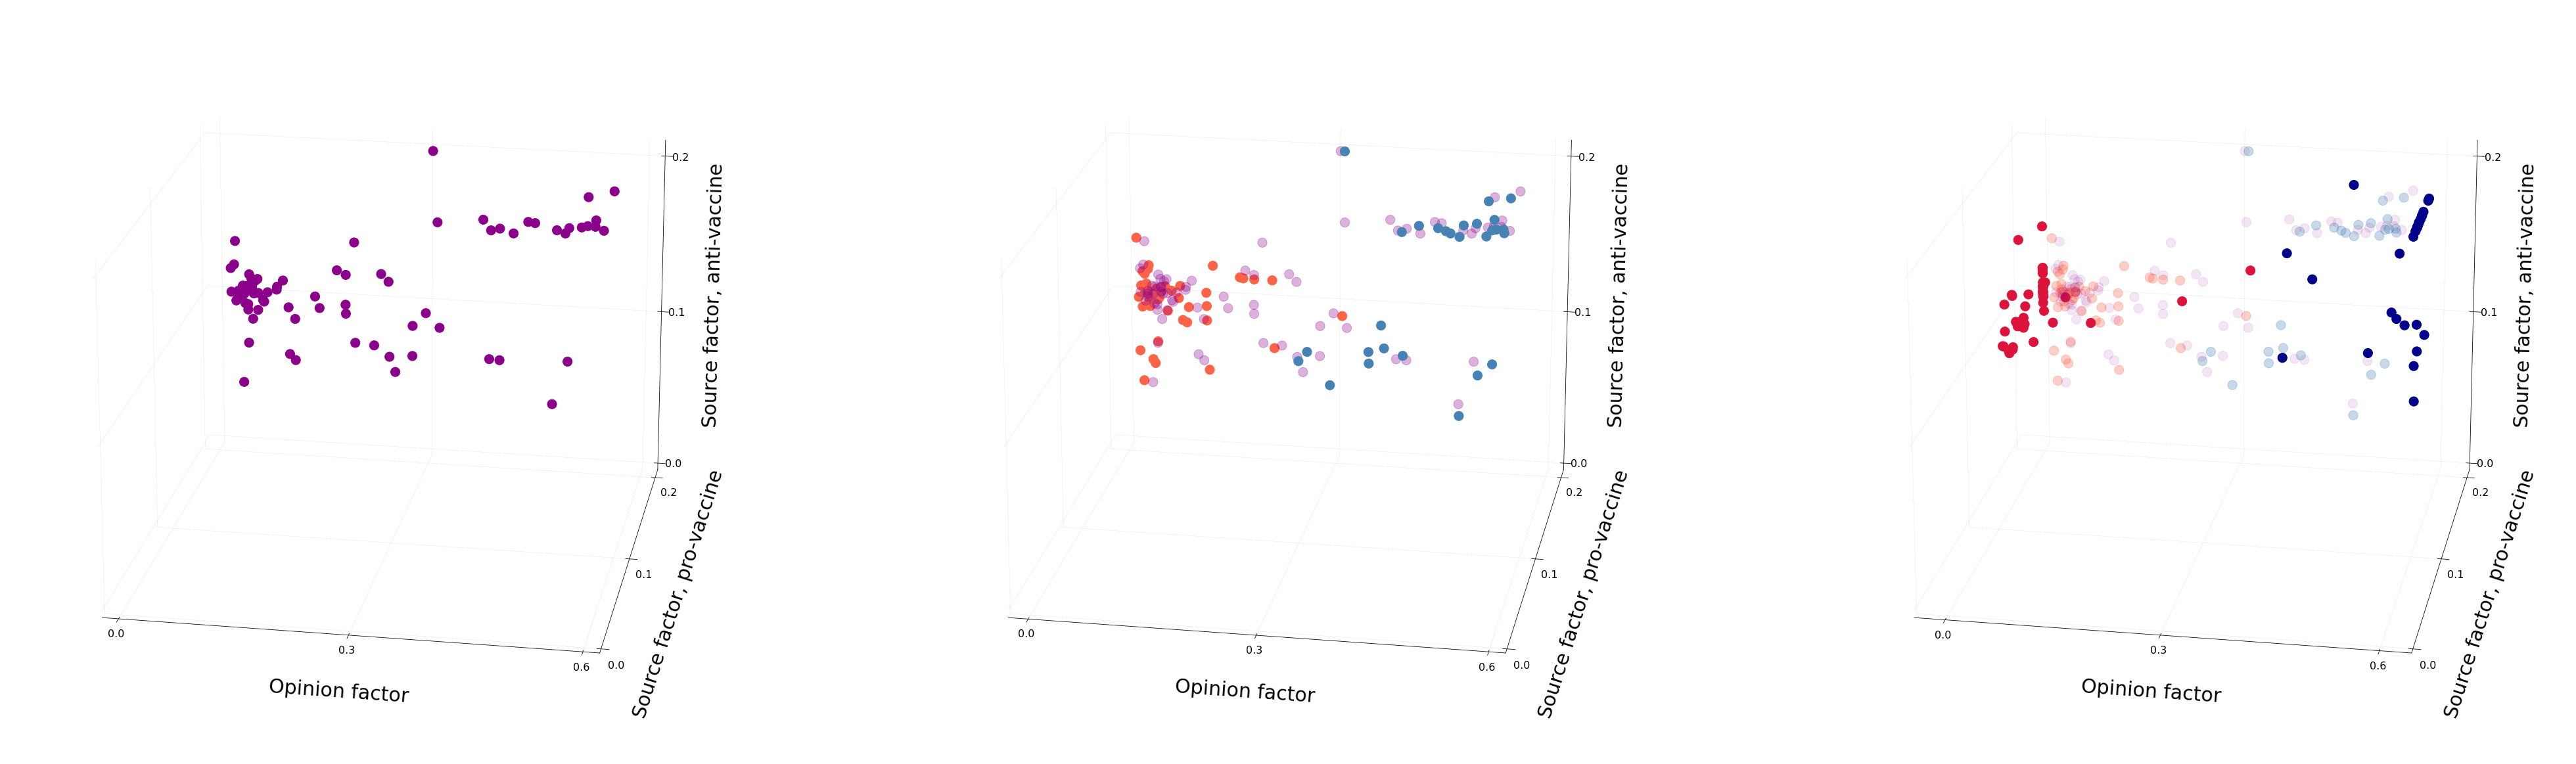

In [68]:
cluster_1_P1 = P1_ukr[P1_ukr['cluster']=='proR']
cluster_2_P1 = P1_ukr[P1_ukr['cluster']=='proU']
cluster_3_P1 = P1_ukr[P1_ukr['cluster']=='inter']

cluster_1_P2 = P2_ukr[P2_ukr['cluster']=='proR']
cluster_2_P2 = P2_ukr[P2_ukr['cluster']=='proU']
cluster_3_P2 = P2_ukr[(P2_ukr['cluster']=='interR') & P2_ukr.index.isin(inter_users_ukr)]
cluster_4_P2 = P2_ukr[(P2_ukr['cluster']=='interU') & P2_ukr.index.isin(inter_users_ukr)]

cluster_1_P3 = P3_ukr[(P3_ukr['cluster']=='proR') & P3_ukr.index.isin(inter_users_ukr)]
cluster_2_P3 = P3_ukr[(P3_ukr['cluster']=='proU') & P3_ukr.index.isin(inter_users_ukr)]


fig = plt.figure(figsize=(70,70))
ax = fig.add_subplot(1,3,1, projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


ax.scatter(cluster_3_P1['x'], cluster_3_P1['y_C1'], cluster_3_P1['y_C2'], marker ='o', c='darkmagenta', s= 200, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=40)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=40)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=40)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)

ax = fig.add_subplot(1,3,2, projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.scatter(cluster_3_P1['x'], cluster_3_P1['y_C1'], cluster_3_P1['y_C2'], marker ='o', c='darkmagenta', s= 200, alpha=0.3)

ax.scatter(cluster_3_P2['x'], cluster_3_P2['y_C1'], cluster_3_P2['y_C2'], marker ='o', c='tomato', s= 200, alpha=1)
ax.scatter(cluster_4_P2['x'], cluster_4_P2['y_C1'], cluster_4_P2['y_C2'], marker ='o', c='steelblue', s= 200, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=40)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=40)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=40)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)

ax = fig.add_subplot(1,3,3, projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.scatter(cluster_3_P1['x'], cluster_3_P1['y_C1'], cluster_3_P1['y_C2'], marker ='o', c='darkmagenta', s= 200, alpha=0.1)

ax.scatter(cluster_3_P2['x'], cluster_3_P2['y_C1'], cluster_3_P2['y_C2'], marker ='o', c='tomato', s= 200, alpha=0.3)
ax.scatter(cluster_4_P2['x'], cluster_4_P2['y_C1'], cluster_4_P2['y_C2'], marker ='o', c='steelblue', s= 200, alpha=0.3)

ax.scatter(cluster_1_P3['x'], cluster_1_P3['y_C1'], cluster_1_P3['y_C2'], marker ='o', c='crimson', s= 200, alpha=1)
ax.scatter(cluster_2_P3['x'], cluster_2_P3['y_C1'], cluster_2_P3['y_C2'], marker ='o', c='darkblue', s= 200, alpha=1)


ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=40)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=40)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=40)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)
plt.savefig('temporal_clusters_ukraine.pdf', format='pdf')

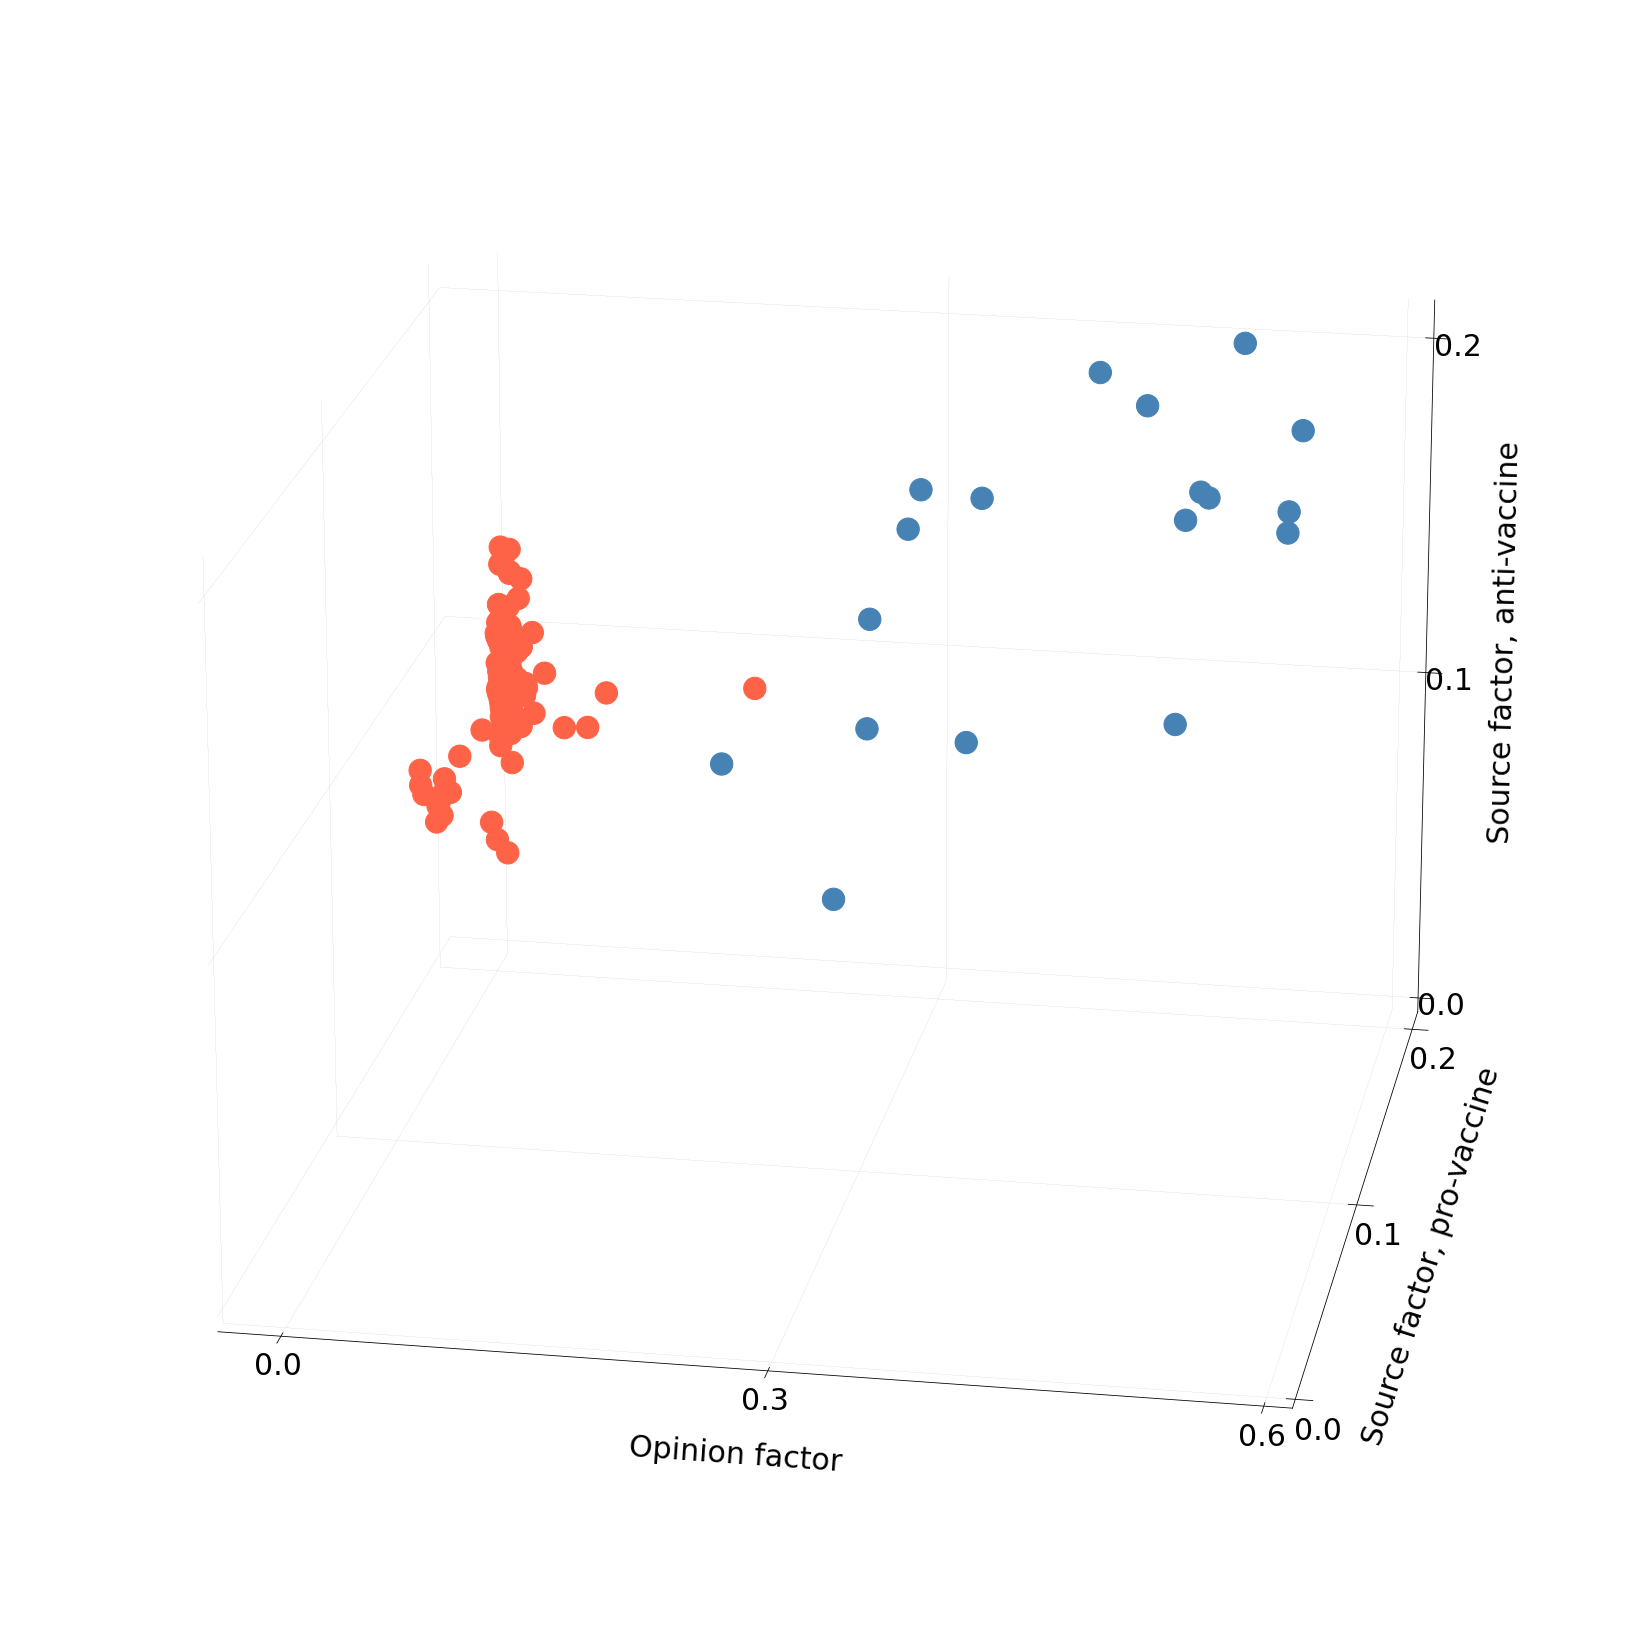

In [66]:
fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


# ax.scatter(cluster_3_P1_1['x'], cluster_3_P1_1['y_C1'], cluster_3_P1_1['y_C2'], marker ='o', c='tomato', s= 500, alpha=1)
# ax.scatter(cluster_4_P1_1['x'], cluster_4_P1_1['y_C1'], cluster_4_P1_1['y_C2'], marker ='o', c='steelblue', s= 500, alpha=1)


# ax.scatter(cluster_3_P1_2['x'], cluster_3_P1_2['y_C1'], cluster_3_P1_2['y_C2'], marker ='o', c='tomato', s= 500, alpha=1)
# ax.scatter(cluster_4_P1_2['x'], cluster_4_P1_2['y_C1'], cluster_4_P1_2['y_C2'], marker ='o', c='steelblue', s= 500, alpha=1)


ax.scatter(cluster_3_P1_3['x'], cluster_3_P1_3['y_C1'], cluster_3_P1_3['y_C2'], marker ='o', c='tomato', s= 500, alpha=1)
ax.scatter(cluster_4_P1_3['x'], cluster_4_P1_3['y_C1'], cluster_4_P1_3['y_C2'], marker ='o', c='steelblue', s= 500, alpha=1)


ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=40)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=40)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=40)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30, pad=10)
ax.tick_params(axis='z', labelsize=30, pad=10)

ax.view_init(20, -80)

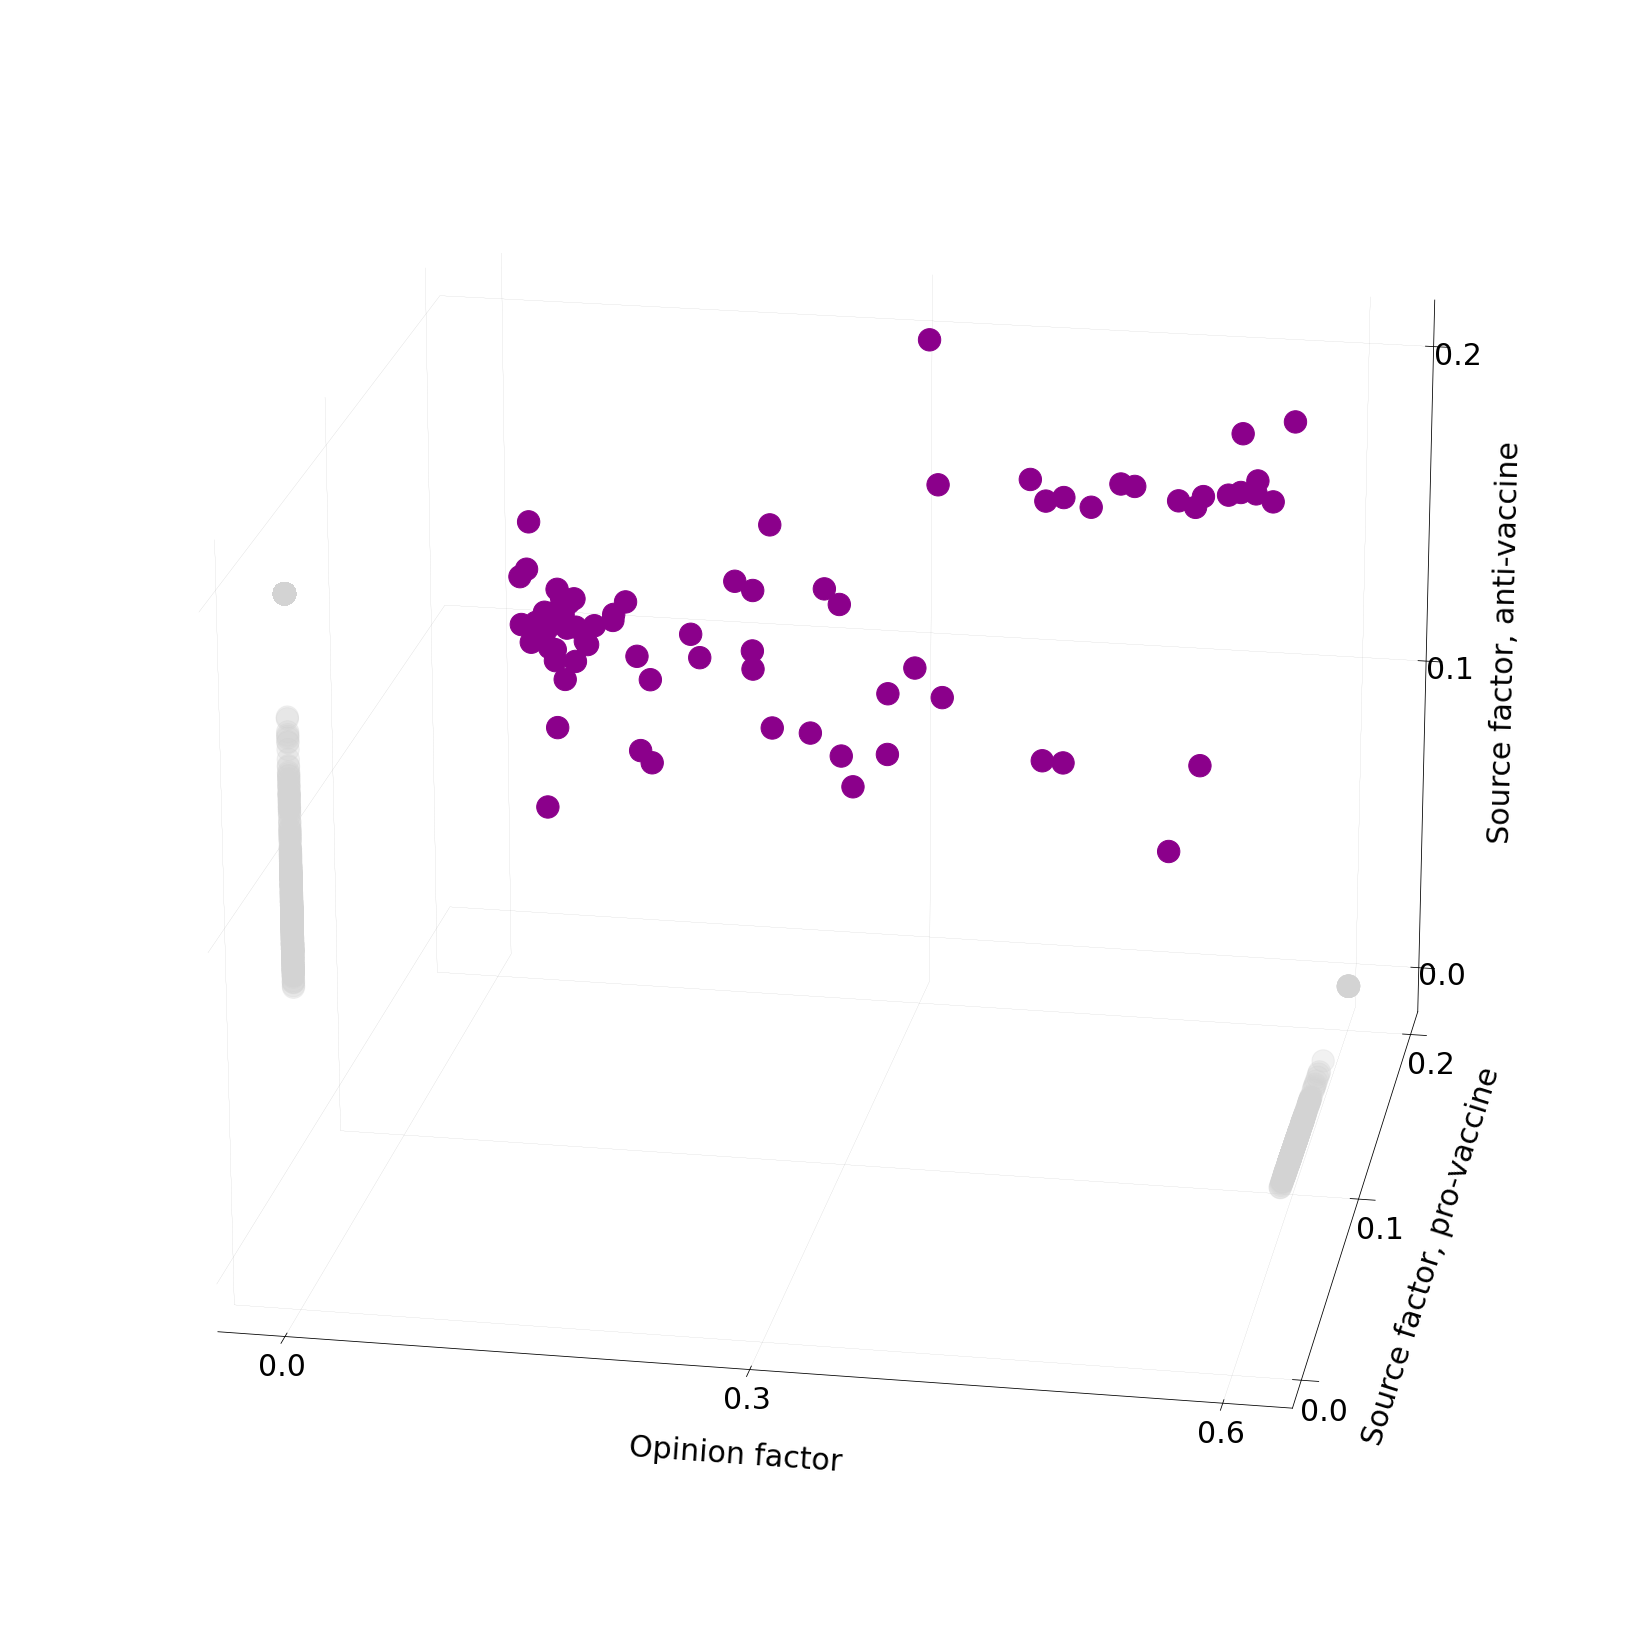

In [72]:
fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


ax.scatter(cluster_1_P1['x'], cluster_1_P1['y_C1'], cluster_1_P1['y_C2'], marker ='o', c='lightgrey', s= 500, alpha=0.3)
ax.scatter(cluster_2_P1['x'], cluster_2_P1['y_C1'], cluster_2_P1['y_C2'], marker ='o', c='lightgrey', s= 500, alpha=0.3)

ax.scatter(cluster_3_P1['x'], cluster_3_P1['y_C1'], cluster_3_P1['y_C2'], marker ='o', c='darkmagenta', s= 500, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=40)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=40)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=40)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30, pad=10)
ax.tick_params(axis='z', labelsize=30, pad=10)

ax.view_init(20, -80)

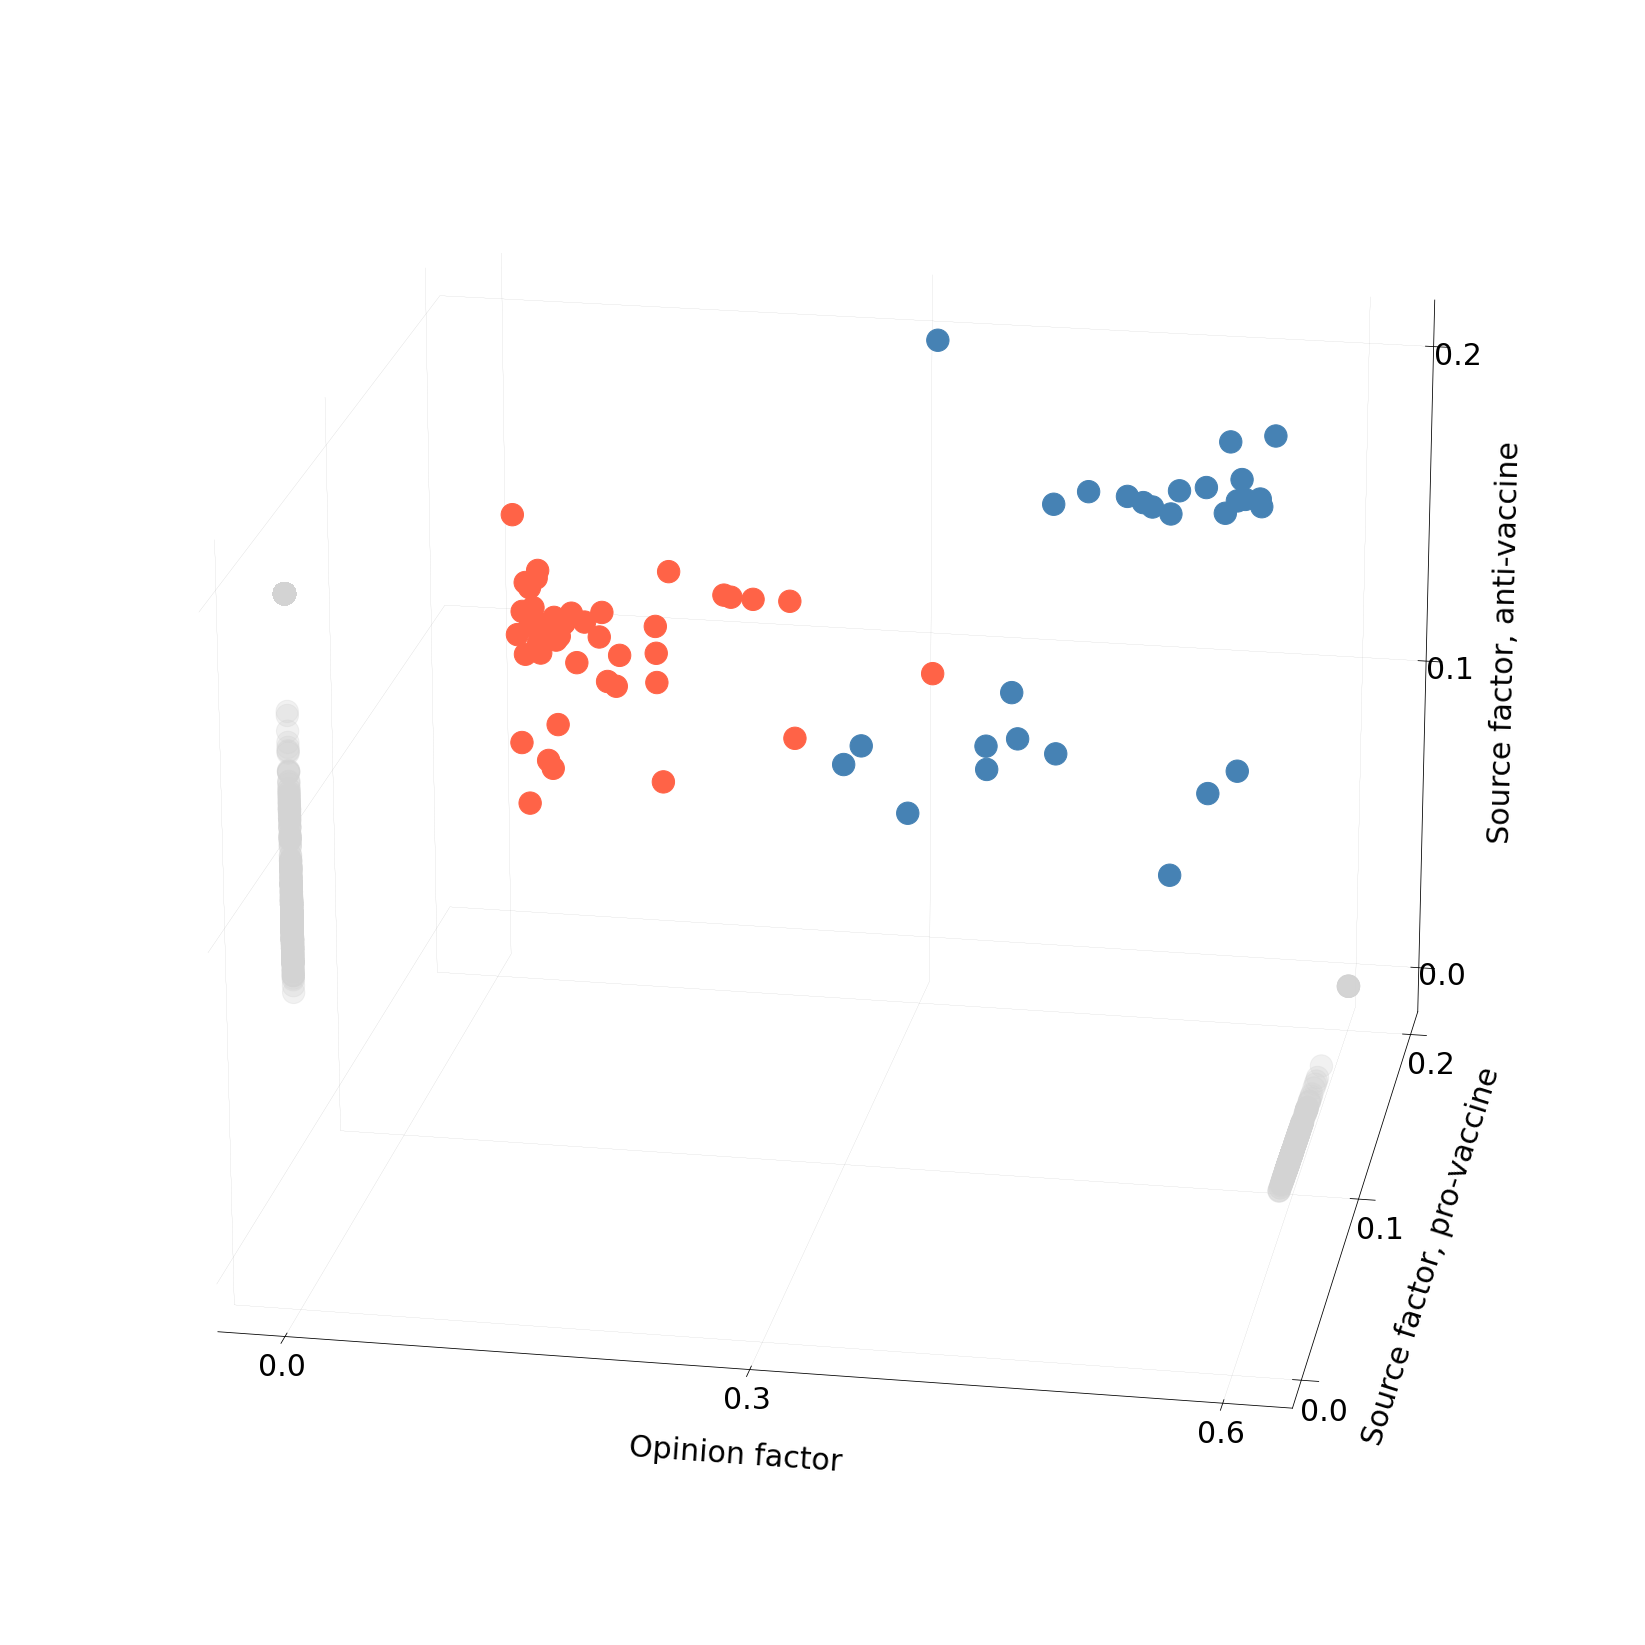

In [73]:
fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# ax.scatter(cluster_3_P1['x'], cluster_3_P1['y_C1'], cluster_3_P1['y_C2'], marker ='o', c='darkmagenta', s= 500, alpha=0.3)

ax.scatter(cluster_1_P2['x'], cluster_1_P2['y_C1'], cluster_1_P2['y_C2'], marker ='o', c='lightgrey', s= 500, alpha=0.3)
ax.scatter(cluster_2_P2['x'], cluster_2_P2['y_C1'], cluster_2_P2['y_C2'], marker ='o', c='lightgrey', s= 500, alpha=0.3)

ax.scatter(cluster_3_P2['x'], cluster_3_P2['y_C1'], cluster_3_P2['y_C2'], marker ='o', c='tomato', s= 500, alpha=1)
ax.scatter(cluster_4_P2['x'], cluster_4_P2['y_C1'], cluster_4_P2['y_C2'], marker ='o', c='steelblue', s= 500, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=40)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=40)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=40)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30, pad=10)
ax.tick_params(axis='z', labelsize=30, pad=10)

ax.view_init(20, -80)

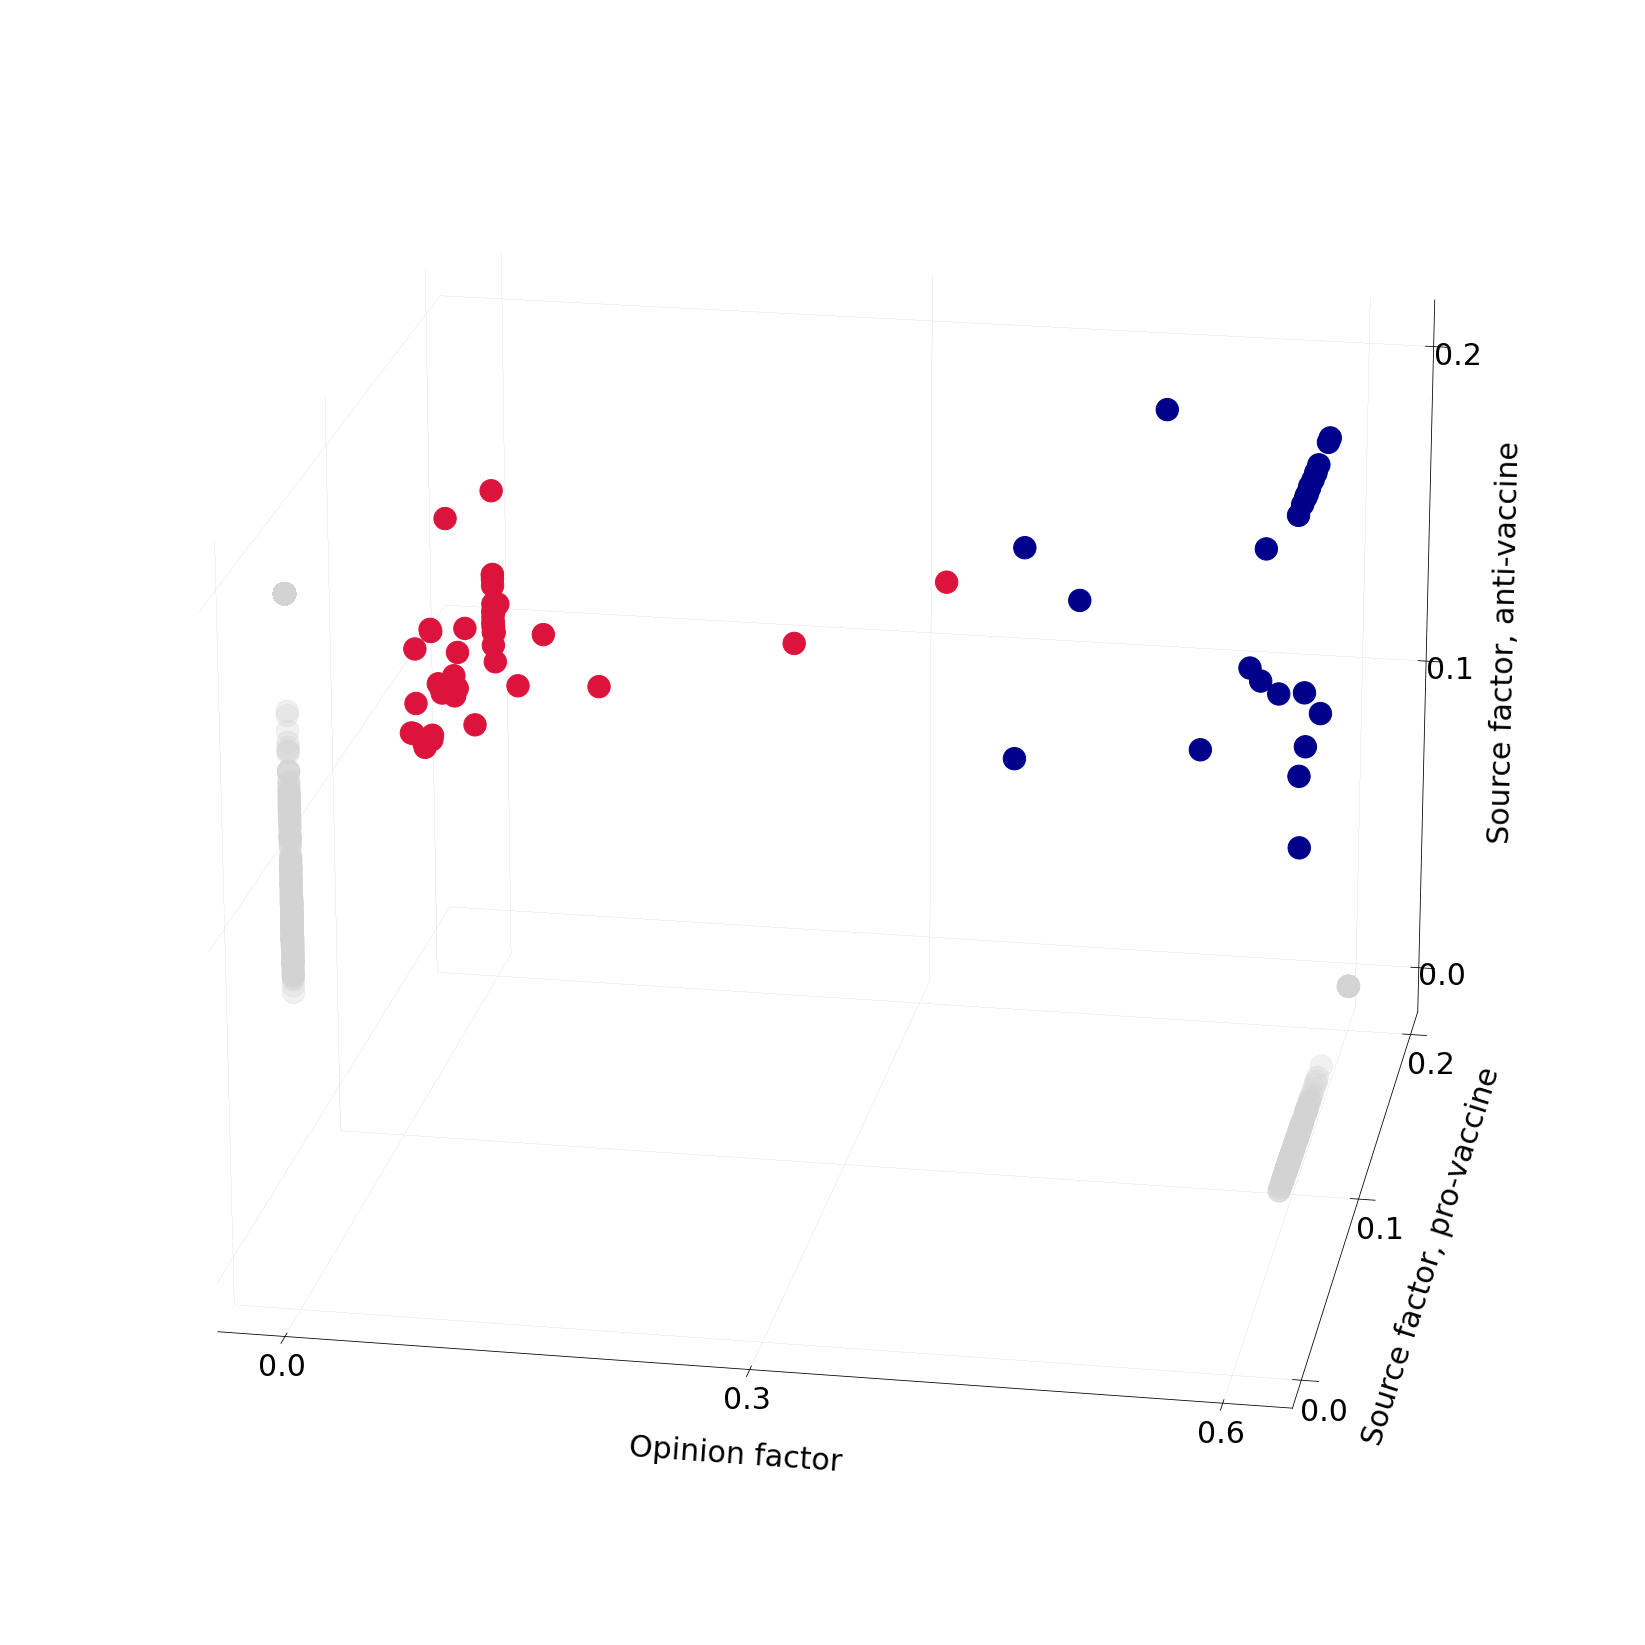

In [74]:
fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# ax.scatter(cluster_3_P1['x'], cluster_3_P1['y_C1'], cluster_3_P1['y_C2'], marker ='o', c='darkmagenta', s= 500, alpha=0.1)

# ax.scatter(cluster_3_P2['x'], cluster_3_P2['y_C1'], cluster_3_P2['y_C2'], marker ='o', c='tomato', s= 500, alpha=0.3)
# ax.scatter(cluster_4_P2['x'], cluster_4_P2['y_C1'], cluster_4_P2['y_C2'], marker ='o', c='steelblue', s= 500, alpha=0.3)

ax.scatter(cluster_1_P2['x'], cluster_1_P2['y_C1'], cluster_1_P2['y_C2'], marker ='o', c='lightgrey', s= 500, alpha=0.3)
ax.scatter(cluster_2_P2['x'], cluster_2_P2['y_C1'], cluster_2_P2['y_C2'], marker ='o', c='lightgrey', s= 500, alpha=0.3)

ax.scatter(cluster_1_P3['x'], cluster_1_P3['y_C1'], cluster_1_P3['y_C2'], marker ='o', c='crimson', s= 500, alpha=1)
ax.scatter(cluster_2_P3['x'], cluster_2_P3['y_C1'], cluster_2_P3['y_C2'], marker ='o', c='darkblue', s= 500, alpha=1)


ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=40)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=40)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=40)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30, pad=10)
ax.tick_params(axis='z', labelsize=30, pad=10)

ax.view_init(20, -80)

# Sankey

In [63]:
import plotly.graph_objects as go
from webcolors import hex_to_rgb

In [64]:
def get_data_sankey(df):
    df_sankey = df.copy()
    df_sankey = df_sankey.T
    retweeters = df.columns.tolist()
    for i in tqdm(range(len(retweeters))):
        for j in range(0,15,1):
            df_sankey.loc[retweeters[i], j] = str(df_sankey.loc[retweeters[i], j])+'_'+str(j)

    df_sankey.columns = df_sankey.columns.astype(str)
    df_sankey.index.drop_duplicates()
    df_sankey = df_sankey.reset_index().drop_duplicates(subset='index', keep='first').set_index('index')
    sankey_fig = df_sankey.groupby(df_sankey.columns.tolist()).size().reset_index().rename(columns={0:'count'})
    return df_sankey, sankey_fig

## COVID-19 vaccine debate

In [65]:
df, fig = get_data_sankey(clusters_vacc)

  0%|          | 0/685 [00:00<?, ?it/s]

100%|██████████| 685/685 [00:00<00:00, 1060.06it/s]


In [66]:
source = []
target = []
values = []
for p in tqdm(range(14)):
    data = df[[str(p),str(p+1)]]
    results = data.groupby(data.columns.tolist()).size().rename('sum')
    results = pd.DataFrame(results)

    for i in range(results.shape[0]):
        source.append(results.iloc[i].name[0])
        target.append(results.iloc[i].name[1])
        values.append(results.iloc[i].values[0])

100%|██████████| 14/14 [00:00<00:00, 406.15it/s]


In [67]:
nodes_labels = []
for p in range(15):
    for i in df[str(p)].unique().tolist():
        nodes_labels.append(i)

In [68]:
node_dict = {y:x for x, y in enumerate(nodes_labels)}

In [69]:
source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

In [70]:
node_color = ['#42A9A2', '#A2D9CE', '#FEAF37', '#F2D270', '#42A9A2', '#A2D9CE', '#FEAF37', '#F2D270', '#42A9A2', '#A2D9CE', '#FEAF37', '#F2D270', '#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37','#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37']

In [71]:
node_label_color = {x:y for x, y in zip(nodes_labels, node_color)}
link_color = [node_label_color[x] for x in target]

In [72]:
link_color = ['rgba({},{},{}, 0.4)'.format(
    hex_to_rgb(x)[0],
    hex_to_rgb(x)[1],
    hex_to_rgb(x)[2]) for x in link_color] 

In [75]:
fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            #label = nodes_labels,
            color = node_color
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values,
            color = link_color,
        ))])

fig.write_image('sankey_vaccine.pdf')
fig.show()


 ## Ukraine conflict debate

In [76]:
clusters_ukr_index = pd.read_csv('../results/temporal_analysis/ukraine_conflict_clusters.csv', index_col=0)

In [77]:
clusters_ukr_index.head()

S1U  S2U  S3U  S4U  S5U  S6U  S7U  S8U  S10U  S12U  ...  S979U  S981U  \
0    5    6    5    6    6    5    6    5     5     6  ...      2      1   
1    6    7    6    7    7    6    7    6     6     7  ...      0      1   
2    2    2    2    2    2    2    2    2     2     2  ...      0      1   
3    2    2    2    2    2    2    2    2     2     2  ...      1      1   
4    3    3    3    3    3    3    3    3     3     3  ...      1      1   

   S983U  S986U  S988U  S990U  S996U  S997U  S998U  S999U  
0      2      2      2      0      0      0      2      2  
1      0      1      2      1      0      0      2      2  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 784 columns]

In [78]:
df, fig = get_data_sankey(clusters_ukr_index)

100%|██████████| 784/784 [00:00<00:00, 944.54it/s] 


In [79]:
df

0    1    2    3    4    5    6    7    8    9    10    11    12  \
index                                                                       
S1U    5_0  6_1  2_2  2_3  3_4  3_5  3_6  3_7  3_8  3_9  3_10  3_11  3_12   
S2U    6_0  7_1  2_2  2_3  3_4  3_5  3_6  3_7  3_8  2_9  2_10  2_11  2_12   
S3U    5_0  6_1  2_2  2_3  3_4  3_5  3_6  3_7  3_8  3_9  3_10  3_11  3_12   
S4U    6_0  7_1  2_2  2_3  3_4  3_5  3_6  3_7  3_8  3_9  3_10  3_11  3_12   
S5U    6_0  7_1  2_2  2_3  3_4  3_5  3_6  3_7  3_8  3_9  3_10  3_11  3_12   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
S990U  0_0  1_1  0_2  0_3  0_4  0_5  0_6  0_7  0_8  0_9  0_10  0_11  0_12   
S996U  0_0  0_1  0_2  0_3  0_4  0_5  0_6  0_7  0_8  0_9  0_10  0_11  0_12   
S997U  0_0  0_1  0_2  0_3  0_4  0_5  0_6  0_7  0_8  0_9  0_10  0_11  0_12   
S998U  2_0  2_1  0_2  0_3  0_4  0_5  0_6  0_7  0_8  0_9  0_10  0_11  0_12   
S999U  2_0  2_1  0_2  0_3  0_4  0_5  0_6  0_7  0_8  0_9  0_10  0_11  0_12   

         13    14  
index              
S1U    1_13  1_14  
S2U    1_13  1_14  
S3U    1_13  1_14  
S4U    1_13  1_14  
S5U    1_13  1_14  
...     ...   ...  
S990U  0_13  0_14  
S996U  0_13  0_14  
S997U  0_13  0_14  
S998U  0_13  0_14  
S999U  0_13  0_14  

[784 rows x 15 columns]

In [80]:
source = []
target = []
values = []
for p in tqdm(range(14)):
    data = df[[str(p),str(p+1)]]
    results = data.groupby(data.columns.tolist()).size().rename('sum')
    results = pd.DataFrame(results)

    for i in range(results.shape[0]):
        source.append(results.iloc[i].name[0])
        target.append(results.iloc[i].name[1])
        values.append(results.iloc[i].values[0])

100%|██████████| 14/14 [00:00<00:00, 330.99it/s]


In [81]:
nodes_labels = []
for p in range(15):
    for i in df[str(p)].unique().tolist():
        nodes_labels.append(i)

In [82]:
node_dict = {y:x for x, y in enumerate(nodes_labels)}

In [83]:
source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

In [84]:
node_color = ['#EE49D5', '#A569BD', '#1ABC9C', '#DE5DE2', '#F9BE38', '#38E1F9', '#F95538', '#8C44D1',
 '#EE49D5', '#A569BD', '#1ABC9C', '#DE5DE2', '#67F938','#F9BE38', '#38E1F9', '#F95538', '#8C44D1', 
 '#ED1F4B', '#F4A8FB', '#4E64E0', 
 '#ED1F4B', '#F4A8FB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#4E64E0', '#3498DB',
 '#ED1F4B', '#FAA04C', '#4E64E0', '#3498DB', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0',
 '#ED1F4B', '#3498DB', 
 '#ED1F4B', '#3498DB']

In [85]:
node_label_color = {x:y for x, y in zip(nodes_labels, node_color)}
link_color = [node_label_color[x] for x in target]

In [86]:
link_color = ['rgba({},{},{}, 0.4)'.format(
    hex_to_rgb(x)[0],
    hex_to_rgb(x)[1],
    hex_to_rgb(x)[2]) for x in link_color] 

In [89]:
fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            #label = nodes_labels,
            color = node_color
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values,
            color = link_color,
        ))])

fig.write_image('sankey_ukraine.pdf')
fig.show()

# Dynamics

In [90]:
%matplotlib inline

In [91]:
from pydlc import dense_lines

In [92]:
from sklearn.linear_model import LinearRegression

## COVID-19 vaccine debate

In [93]:
inter_provax_users = []
inter_antivax_users = []
provax_only_users = []
antivax_only_users = []
outliers = []
for u in users_vacc:
    if clusters_vacc[u].eq('interPro').any() == True:
        inter_provax_users.append(u)
    elif  clusters_vacc[u].eq('interAnti').any() == True:
        inter_antivax_users.append(u)
    elif clusters_vacc[u].eq('pro').all() == True:
        provax_only_users.append(u)
    elif clusters_vacc[u].eq('anti').all() == True:
        antivax_only_users.append(u)
    else:
        outliers.append(u) #Utilisateurs qui passent d'une communauté à une autre, sans jamais être intermédiaire

In [94]:
inter_users = inter_provax_users + inter_antivax_users

In [95]:
print('Provax only :', len(provax_only_users))
print('Antivax only :', len(antivax_only_users))
print('Inter provax :', len(inter_provax_users))
print('Inter antivax :', len(inter_antivax_users))
print('Outliers :', len(outliers))

Provax only : 216
Antivax only : 345
Inter provax : 18
Inter antivax : 104
Outliers : 2


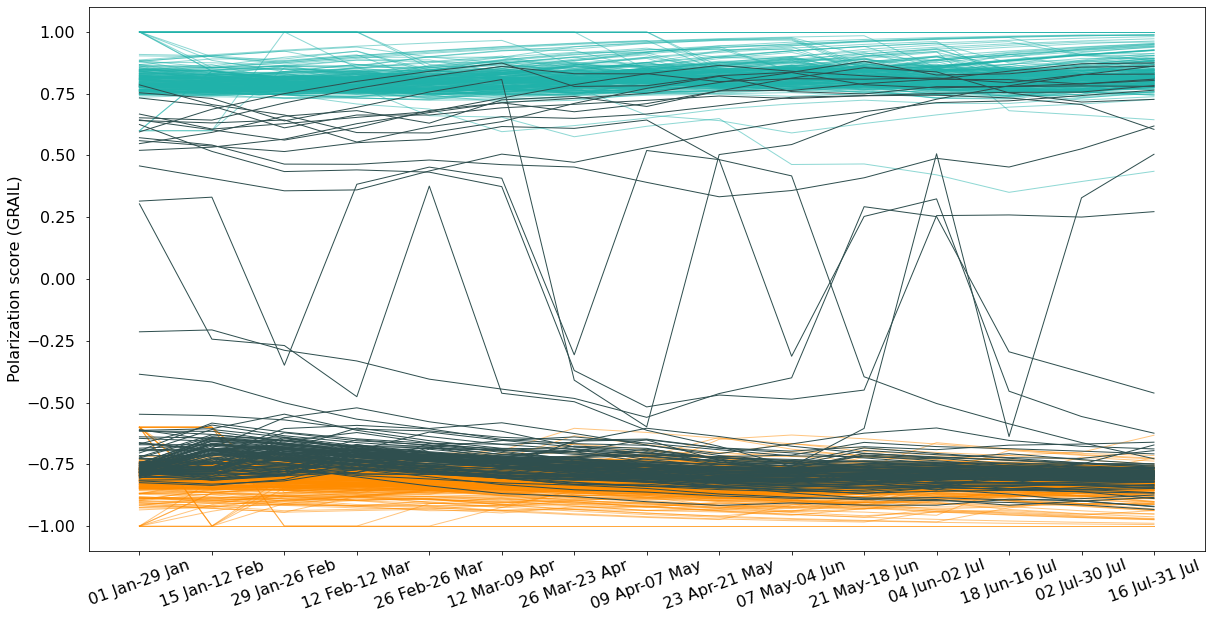

In [97]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(grail_temporal_vacc[provax_only_users],color='lightseagreen', linewidth=1, alpha=0.5)
ax.plot(grail_temporal_vacc[antivax_only_users],color='darkorange', linewidth=1, alpha=0.5)
ax.plot(grail_temporal_vacc[inter_users],color='darkslategrey', linewidth=1)

ax.set_ylabel('Polarization score (GRAIL)', fontsize=16)

labels = []
for p in range(len(periods)):
    label = periods[p][0].strftime('%d %b')+'-'+periods[p][1].strftime('%d %b')
    labels.append(label)
ax.set_xticks(np.arange(0,15,1),labels, rotation = 20, fontsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)

plt.savefig('grail_evolution_vaccine.pdf', format='pdf')
plt.show()

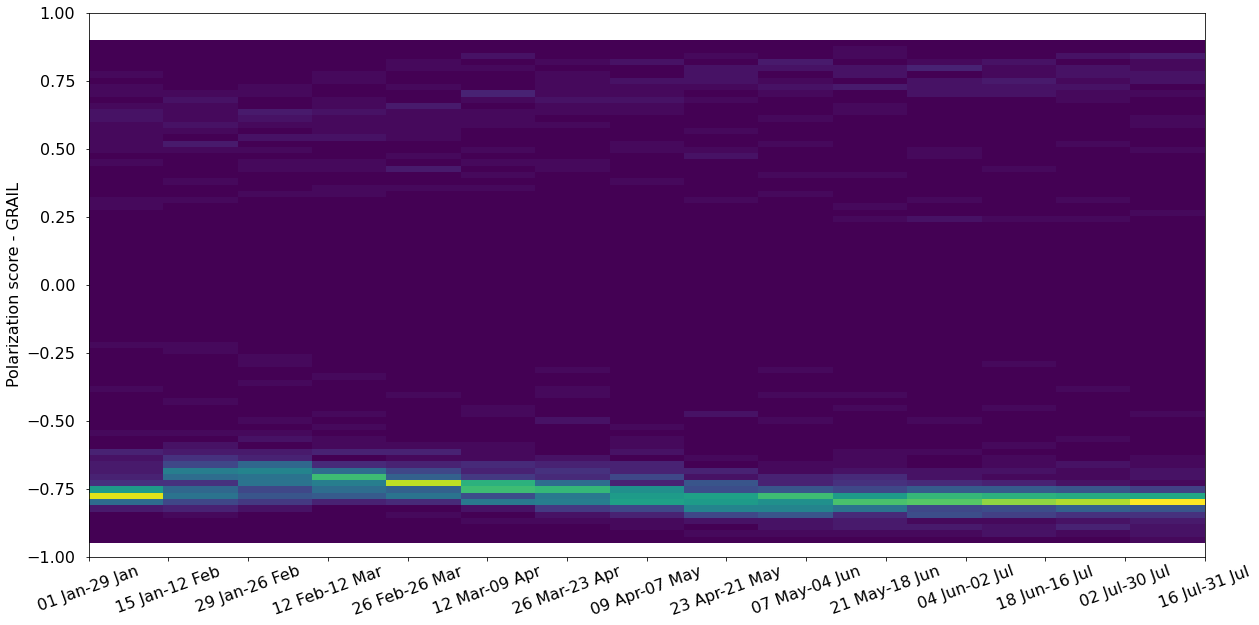

In [101]:
fig, ax = plt.subplots(figsize=(20,10))
im = dense_lines(ys=np.array(grail_temporal_vacc[inter_users].T.values), x=np.array(grail_temporal_vacc[inter_users].index), ax=ax, ny=80, cmap='viridis')
ax.set_ylim(-1,1)
labels = []
for p in range(0,15,1):
    label = periods[p][0].strftime('%d %b')+'-'+periods[p][1].strftime('%d %b')
    labels.append(label)
ax.set_xticks(np.arange(0,15,1),labels, rotation = 20, fontsize=16)
ax.set_ylabel('Polarization score - GRAIL', fontsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
plt.savefig('heatmap_evolution_grail_vaccine.pdf', format='pdf')
plt.show()

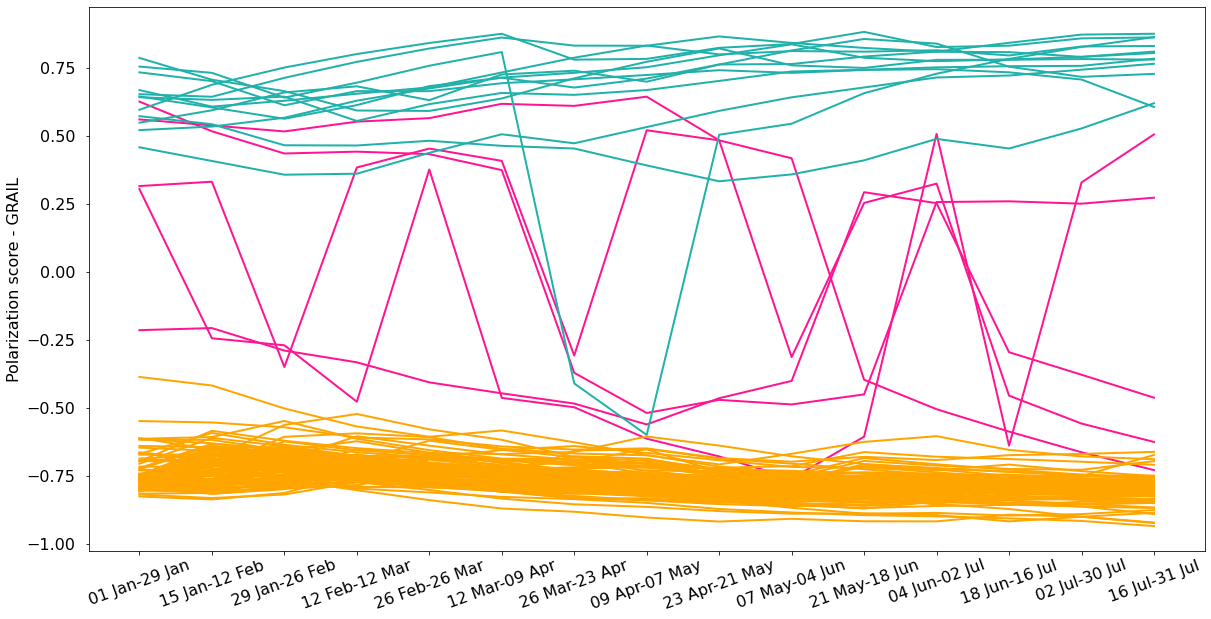

In [107]:
fig, ax = plt.subplots(figsize=(20,10))
colors = ['deeppink','lightseagreen','orange']
for k in range(dynamics_vacc['cluster_kmeans'].nunique()):
    df = dynamics_vacc[dynamics_vacc['cluster_kmeans']==k].iloc[:, :15].T
    ax.plot(df, color=colors[k], linewidth=2)
    ax.set_ylabel('Polarization score - GRAIL', fontsize=16)
    labels = []
    for p in range(len(periods)):
        label = periods[p][0].strftime('%d %b')+'-'+periods[p][1].strftime('%d %b')
        labels.append(label)
    ax.set_xticks(np.arange(0,15,1),labels, rotation = 20, fontsize=16)
    ax.tick_params(axis='y', labelsize=16, pad=10)
plt.savefig('dynamics_vaccine.pdf', format='pdf')
plt.show()

Coeff [0.01415435]
Interception 0.6167109219057474
R² 0.5432753041385805
Coeff [-0.03027659]
Interception -0.43910534529621703
R² 0.9368060406481951


C:\Users\CTREUI~1.BID\AppData\Local\Temp/ipykernel_27020/1283731790.py:15: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.

C:\Users\CTREUI~1.BID\AppData\Local\Temp/ipykernel_27020/1283731790.py:15: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.



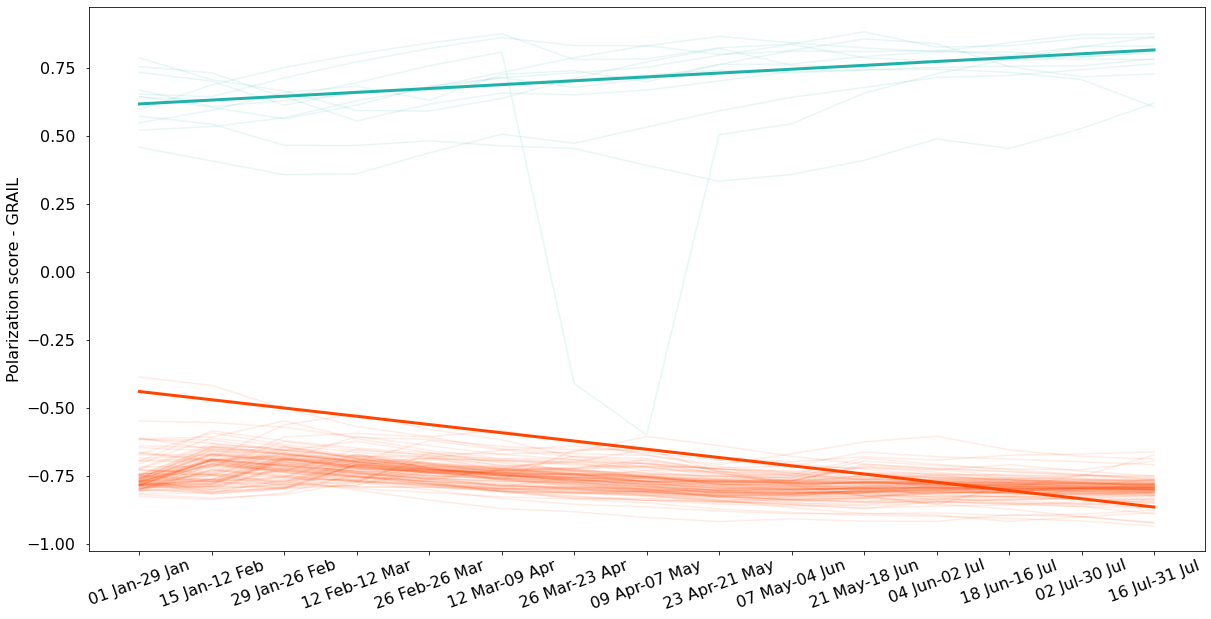

In [112]:
fig, ax = plt.subplots(figsize=(20,10))
colors = {0:'blue', 1:'lightseagreen', 2:'orangered'}

for i in [1,2]:
    cluster_sequences = np.array(dynamics_vacc[dynamics_vacc['cluster_kmeans']==i].iloc[:, :15])
    for seq in cluster_sequences:
        plt.plot(seq.ravel(), color=colors[i], alpha=0.1)
    
    model = LinearRegression()
    model.fit(np.arange(len(cluster_sequences[0])).reshape(-1,1), cluster_sequences[0].ravel())
    print('Coeff', model.coef_)
    print('Interception', model.intercept_)
    print('R²', model.score(np.arange(len(cluster_sequences[0])).reshape(-1,1), cluster_sequences[0].ravel()))
    trend_line = model.predict(np.arange(len(cluster_sequences[0])).reshape(-1,1))
    plt.plot(trend_line, 'r', color=colors[i], linewidth=3)
labels = []
for p in range(0,15,1):
    label = periods[p][0].strftime('%d %b')+'-'+periods[p][1].strftime('%d %b')
    labels.append(label)
ax.set_xticks(np.arange(0,15,1),labels, rotation = 20, fontsize=16)
plt.ylabel('Polarization score - GRAIL', fontsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)

plt.savefig('linear_regression_vaccine.pdf', format='pdf')
plt.show()

## Ukraine conflict debate

In [113]:
#Définition des listes d'utilisateurs
inter_users = []
proU_users = []
proR_users = []
for u in users_ukr:
    if clusters_ukr[u].eq('inter').any() == True:
        inter_users.append(u)
    if clusters_ukr.loc[3, u] == 'proU':
        proU_users.append(u)
    if clusters_ukr.loc[3, u] == 'proR':
        proR_users.append(u)

In [114]:
print('Inter :', len(inter_users))
print('ProU :', len(proU_users))
print('ProR :', len(proR_users))

Inter : 76
ProU : 317
ProR : 391


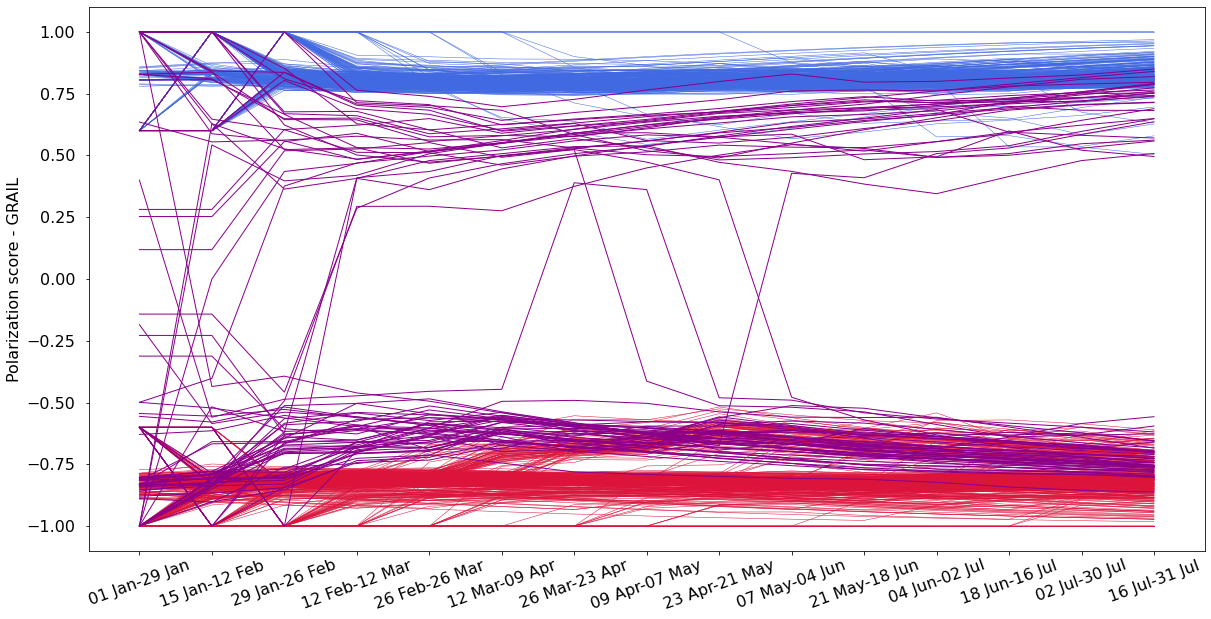

In [116]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(grail_temporal_ukr[proR_users],color='crimson', linewidth=0.5)
ax.plot(grail_temporal_ukr[proU_users],color='royalblue', linewidth=0.5)
ax.plot(grail_temporal_ukr[inter_users],color='darkmagenta', linewidth=1)

ax.set_ylabel('Polarization score - GRAIL', fontsize=16)
labels = []
for p in range(len(periods)):
    label = periods[p][0].strftime('%d %b')+'-'+periods[p][1].strftime('%d %b')
    labels.append(label)
ax.set_xticks(np.arange(0,15,1),labels, rotation = 20, fontsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)

plt.savefig('grail_evolution_ukraine.pdf', format='pdf')
plt.show()

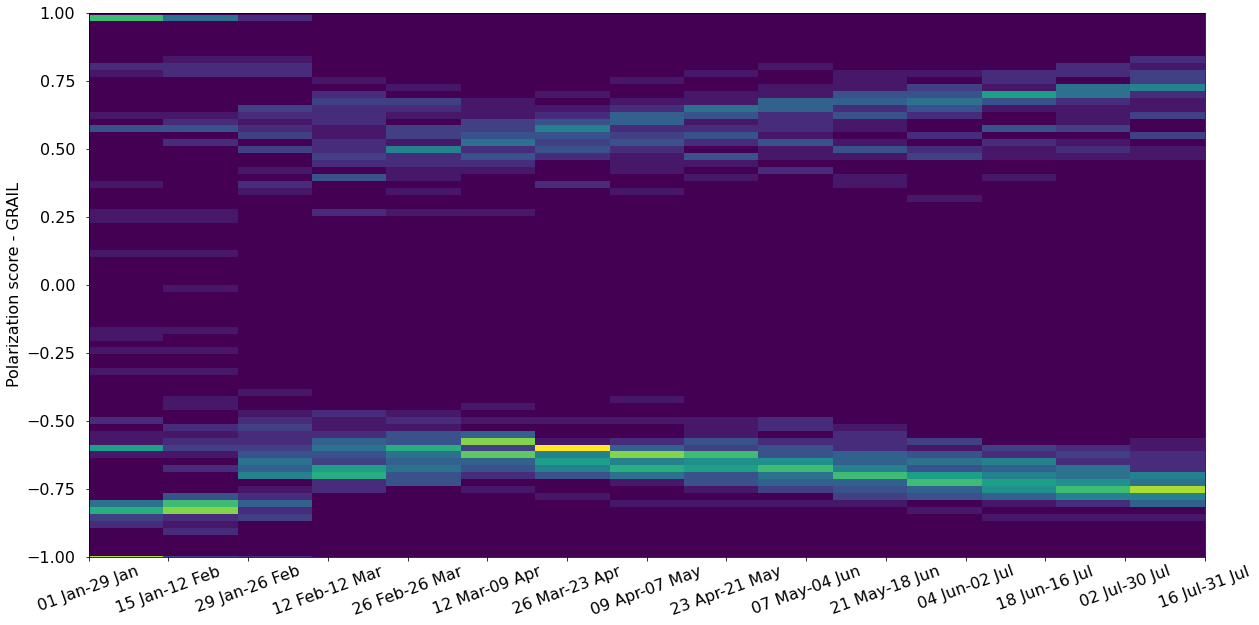

In [117]:
fig, ax = plt.subplots(figsize=(20,10))
im = dense_lines(ys=np.array(grail_temporal_ukr[inter_users].T.values), x=np.array(grail_temporal_ukr[inter_users].index), ax=ax, ny=80, cmap='viridis')
ax.set_ylim(-1,1)
labels = []
for p in range(0,15,1):
    label = periods[p][0].strftime('%d %b')+'-'+periods[p][1].strftime('%d %b')
    labels.append(label)
ax.set_xticks(np.arange(0,15,1),labels, rotation = 20, fontsize=16)
ax.set_ylabel('Polarization score - GRAIL', fontsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)

plt.savefig('heatmap_evolution_grail_ukraine.pdf', format='pdf')
plt.show()

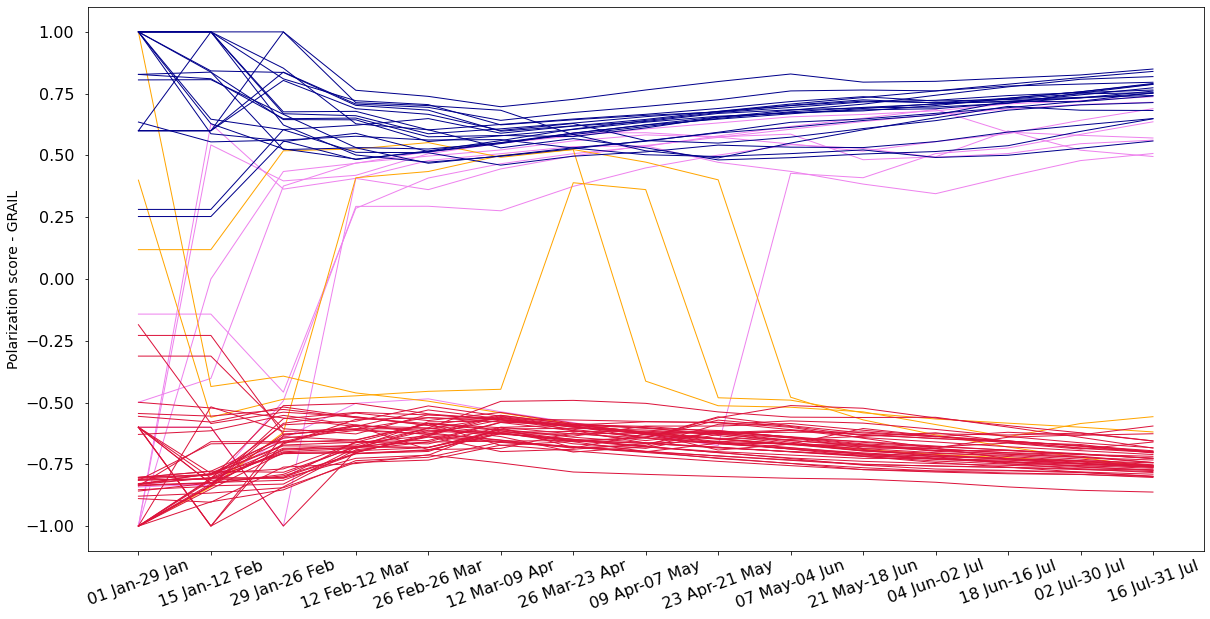

In [120]:
fig, ax = plt.subplots(figsize=(20,10))
colors = ['violet','orange','darkblue','crimson']
for k in range(dynamics_ukr['cluster_kmeans'].nunique()):
    df = dynamics_ukr[dynamics_ukr['cluster_kmeans']==k].iloc[:, :15].T
    ax.plot(df, color=colors[k], linewidth=1)
    ax.set_ylabel('Polarization score - GRAIL', fontsize=14)
    labels = []
    for p in range(len(periods)):
        label = periods[p][0].strftime('%d %b')+'-'+periods[p][1].strftime('%d %b')
        labels.append(label)
    ax.set_xticks(np.arange(0,15,1),labels, rotation = 20, fontsize=16)
    ax.tick_params(axis='y', labelsize=16, pad=10)

plt.savefig('dynamics_ukraine.pdf', format='pdf')
plt.show()

Coeff [-0.0140462]
Interception -0.6507670785665107
R² 0.944049994193524
Coeff [0.02276576]
Interception 0.540622935235298
R² 0.9644257885371849


C:\Users\CTREUI~1.BID\AppData\Local\Temp/ipykernel_27020/1483148436.py:18: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.

C:\Users\CTREUI~1.BID\AppData\Local\Temp/ipykernel_27020/1483148436.py:18: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.



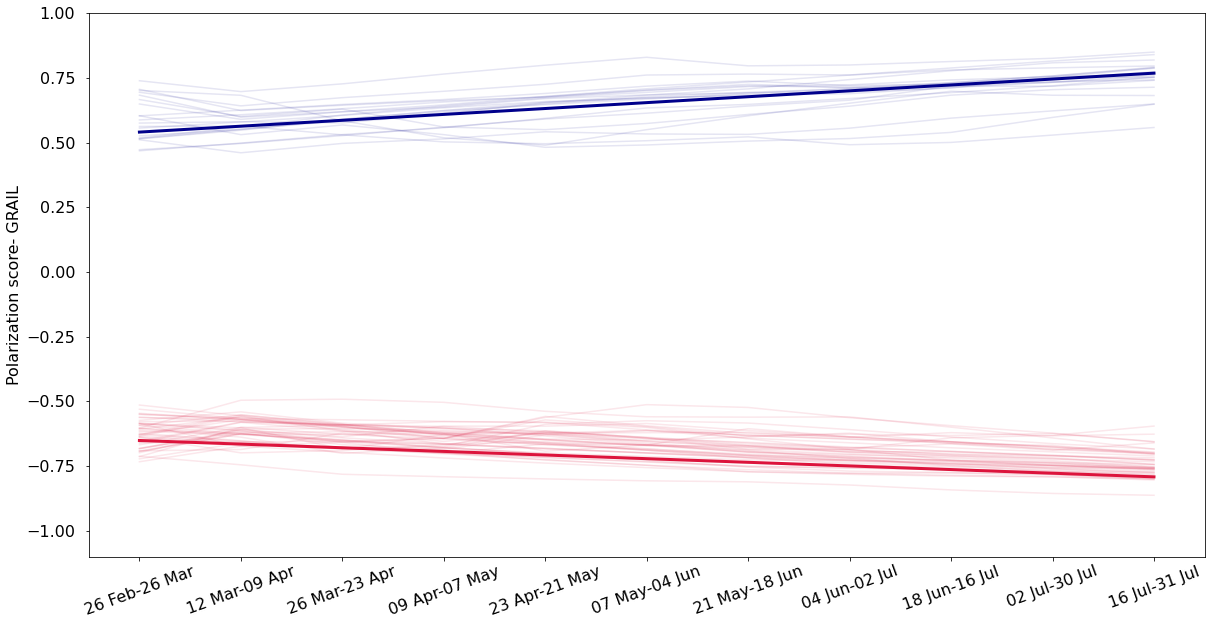

In [125]:
fig, ax = plt.subplots(figsize=(20,10))
#ax.plot(df.iloc[:, :15].T, color='grey', linewidth=0.05)
colors = {3:'crimson', 2:'darkblue'}

for i in [3,2]:
    #ax.plot(km.cluster_centers_[i], linewidth = 3.0, label='cluster_'+str(i))
    
    cluster_sequences = np.array(dynamics_ukr[dynamics_ukr['cluster_kmeans']==i].iloc[:, 4:-1])
    for seq in cluster_sequences:
        plt.plot(seq.ravel(), color=colors[i], alpha=0.1)
    
    model = LinearRegression()
    model.fit(np.arange(len(cluster_sequences[0])).reshape(-1,1), cluster_sequences[0].ravel())
    print('Coeff', model.coef_)
    print('Interception', model.intercept_)
    print('R²', model.score(np.arange(len(cluster_sequences[0])).reshape(-1,1), cluster_sequences[0].ravel()))
    trend_line = model.predict(np.arange(len(cluster_sequences[0])).reshape(-1,1))
    plt.plot(trend_line, 'r', color=colors[i], linewidth=3)
labels = []
for p in range(4,15,1):
    label = periods[p][0].strftime('%d %b')+'-'+periods[p][1].strftime('%d %b')
    labels.append(label)
ax.set_xticks(np.arange(0,11,1),labels, rotation = 20, fontsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)

plt.ylim(-1.1,1)
plt.ylabel('Polarization score- GRAIL', fontsize=16)

plt.savefig('linear_regression_ukraine.pdf', format='pdf')
plt.show()